# Introduction

#### Gabriel Muller and Harry Walters

Econometrics is a field of economics concerning ‘the advancement of economic theory in its relation to statistics and mathematics.’ (Frisch, 1933). Time series analysis is something that is commonly looked at within this field and a common problem within these analysis is the underlying existence of a Spuriours regression. A spurious regression can be typically classified as a time series fit with extremely high correlation ($R^{2}$) but with extremely low Durbin-Watson statistic values (Granger and Newbold, 1974) however the variables tend to be completely unrelated to one another and should not, realistically have a relationship to one another, essentially stating that a fake relationship is present. Another definining feature comes from the extremely high t-statistic values, this is due to the t-statistic not having a defining distribution and therefore the value will tend to diverge to infinity as the sample size increases (Phillips, 1986). Spurious regressions are typically resulted from nonstationary time series data, meaning that a constant mean or constant variance are not directly available with regards to the data. Hence from this, the variables can take on multiple different continuous distributions anything from normal to more abstract distributions such as beta and gamma. From the data available, the monthly data will be solely used for Money Demand and its corresponding rainfall whilst the quarterly data will be used for GDP and its corresponding rainfall values.

Under null hypothesis of an Ordinary Least Squares (OLS) estimator we would have $H_{0}: β_{1} = 0$ against the alternative in which $H_{a}: β_{1} \neq 0$. To create an OLS estimator, a simulation of the variables is required and a random walk method will be used, meaning variables will be randomly generated through a specific distribution with set parameters. The relationship that will be used for this will be a first-order integration model, denoted as I(1). An I(1) model requires the starting value to be set to 0 to reduce bias. From this model it's expected that the autocorrelation value approaches 1 and the expected t-statistic diverges to infinity. (Engle and Granger, 1987). This model is represented as $y_{t} = y_{t-1} + ε_{t}$, it uses the previously computed value of $y$ to find the current value. (Chan and Wei, 1987).  Multiple processes will be carried out for both GDP and Money demand, with the first two methods for each pertaining to the values from the dataset, and the next two being from completely simulating all values with parameters based on the dataset and the last containing a trend factor within it. Prior to simulating any distributions a stochastic approach will be used to find parameters of which to base the distribution from, that is for GDP, rainfall and money demand.

In this case using the rainfall of Perth is used as an estimator for the prediction of both US GDP and UK Money Demand, this realistically should have no real relationship present. Upon creating an OLS regression estimate through a Simple Linear Regression, $y_{t} = α + β_{1}x_{t} + ε_{t}$, the results show $R^{2}$ results from a range of 0.95 upwards to 1. Simultaneously the Durbin-Watson statistic values are extremely low, showing clear signs of a spurious regression being present, even reaching a 0 value. It's also clear that the t-statistic values vary widely from a traditional t-distribution, with t-values quite easily surpassing  values of 1000. These results clearly show a spurious regression being present and the null hypothesis can be rejected as a result where the coefficient is 0. Further a test for unit roots in the data will be carried out based on the cointegration model of the Dickey Fuller test (Dickey and Fuller, 1979)

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.formula.api as sm
import math
import scipy.stats as sp
import seaborn as sns
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.stattools import adfuller

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sns.set(color_codes=True)
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
#Loads in quarterly and monthly data CSV files
month_data = pd.read_csv('monthly_data01.csv')
quarterly = pd.read_csv('quarterly_data01.csv')

In [4]:
#Extracts the values for log_M1 and log_rainfall
lm1 = np.array(month_data.iloc[:, 5])
lrain = np.array(month_data.iloc[:, 6])
lGDP = np.array(quarterly.iloc[:,4])

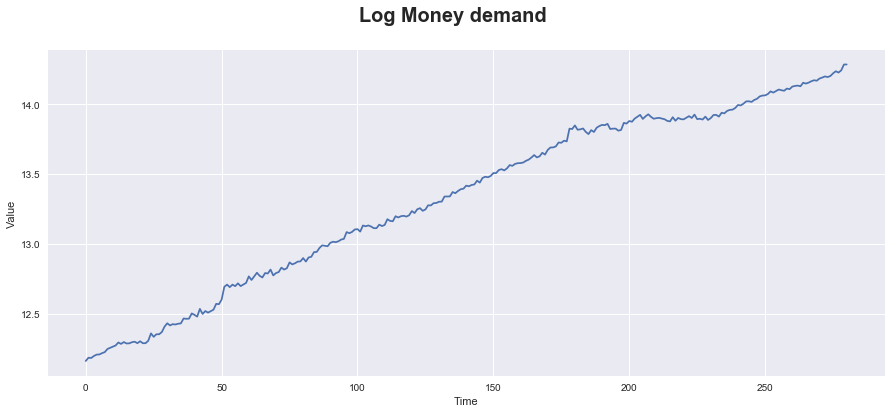

In [5]:
fig = plt.figure()
fig.suptitle('Log Money demand', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
plt.plot(lm1)
#plt.savefig('Plots\ikuyo.png')

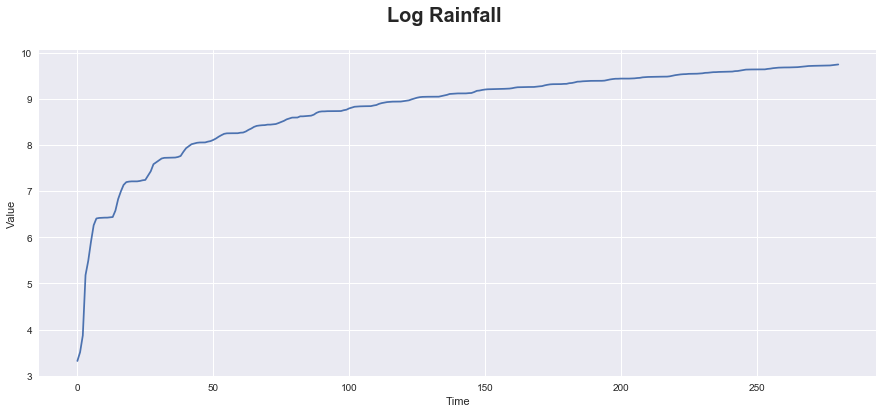

In [6]:
fig = plt.figure()
fig.suptitle('Log Rainfall', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
plt.plot(lrain)
#plt.savefig('Plots\itsumademo.png')

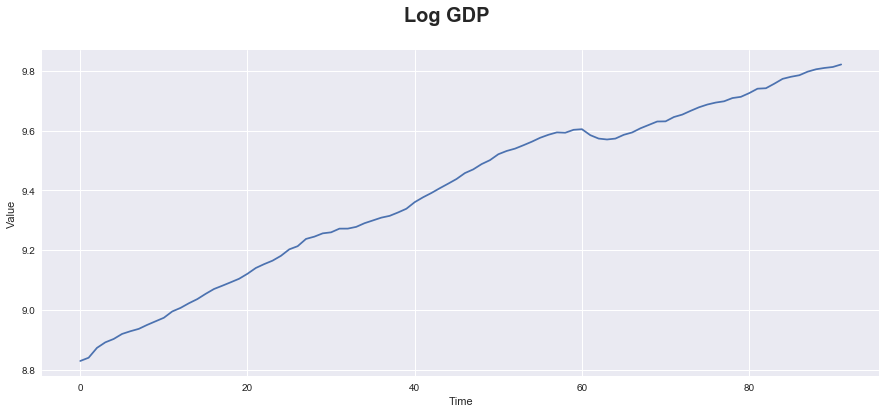

In [7]:
fig = plt.figure()
fig.suptitle('Log GDP', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
plt.plot(lGDP)
#plt.savefig('Plots\sutekidayo.png')

# Original data

From the original data there are two concerns with it. There were two seperate sets of data, monthly and quarterly data, the monthly data did not have GDP within it, this causes a problem as there was a decision needing to be made whether to use this data, in the end we decided to use the monthly data for looking at UK money demand and using the quarterly data for looking at the US GDP. The other problem comes from the amount of data being different in the quarterly and monthly data, the monthly data contained 281 objects with 7 variables, and the quarterly data had 92 objects with 7 variables, this meant that the parameters used for the distributions used would be more consistent with the monthly data rather than the quarterly data.

Spurious regressions are a common trend from non-stationary time series data. As non-stationary data possesses no real stable mean or variance in the data a commonly used tool to overcome this is by taking the differences in the data. By carrying out $y_{t} = y_{t+1} - y_{t}$ a typical trend can be found in the data, or essentially making the data appear stationary in some nature. From the histograms below it can be seen that in fact all 3 variables appear to follow some sort of distribution, with GDP and Money Demand appearing normally distributed whilst rainfall appear to have a Gamma distribution in both the monthly and quarterly data. From this we can deduct two things, rainfall does not follow the same data generating processes as GDP and Money Demand but also assume that the parameters (mean and variance) calculated for these variables are sufficient in acting as the true mean and variance of such variables.Taking the differences follows the methods as discussed by Granger and Newbold, 1974. All three variables are also impossible to take on negative values, or else the data would become senseless and an economy would essentially cease to exist, hence for this reason the variables will be distributed as lognormal rather than normal distributions as well as the error terms following a lognormal distribution. 

In [8]:
#Calculates the difference in log_M1 values, removes NA values, saves it to an array (Month data)    
m1_diff = month_data.iloc[: ,5].diff()
m1_array = np.array(m1_diff)
m1_array = m1_array[~np.isnan(m1_array)]
    
#Calculates the difference in log_rainfall values, removes NA values, saves it to an array (Month data)
rain_diff = month_data.iloc[: ,6].diff()
rain_array = np.array(rain_diff)
rain_array = rain_array[~np.isnan(rain_array)]

#Calculates the difference in logGDP values, removes NA values, saves it to an array (Quarter data)
GDP_diff = quarterly.iloc[: ,4].diff()
GDP_array = np.array(GDP_diff)
GDP_array = GDP_array[~np.isnan(GDP_array)]

#Calculates the difference in log_rainfall values, removes NA values, saves it to an array (Quarter data)
qrain_diff = quarterly.iloc[: ,5].diff()
qrain_array = np.array(qrain_diff)
qrain_array = qrain_array[~np.isnan(qrain_array)]

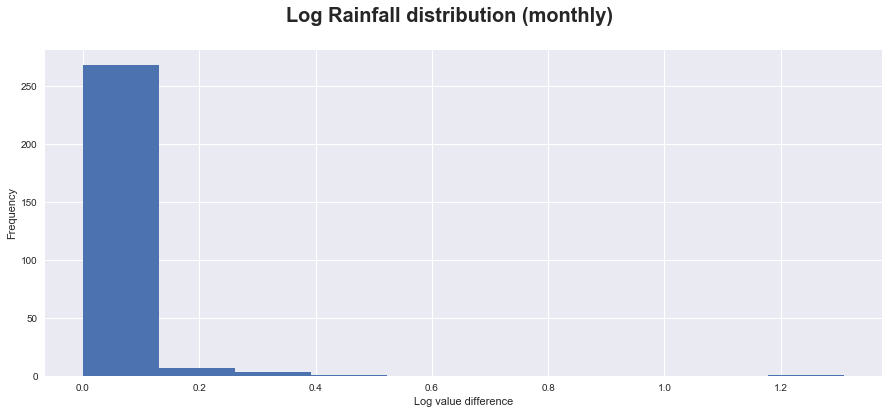

In [9]:
### Histogram of differences in values, monthly log_rainfall appears to have a Gamma distribution
fig = plt.figure()
fig.suptitle('Log Rainfall distribution (monthly)', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Log value difference')
ax.set_ylabel('Frequency')
plt.hist(rain_array)
#plt.savefig('Plots\Histograms\lograin.png')
plt.show()

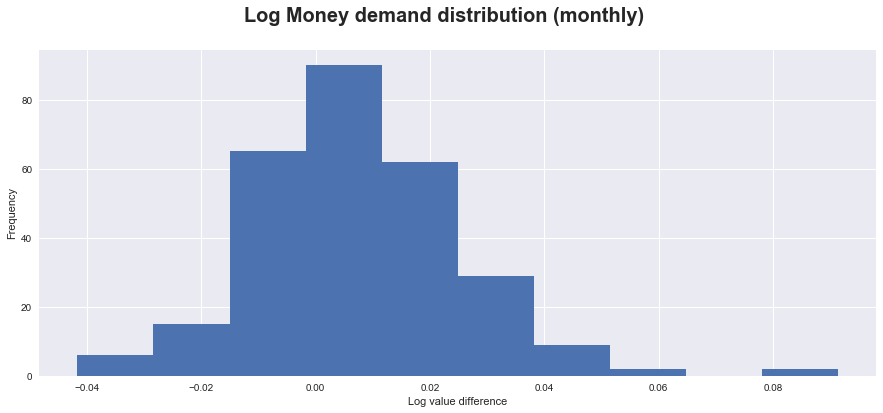

In [10]:
### Histogram of differences in values, monthly log_M1 appears to have a normal distribution
fig = plt.figure()
fig.suptitle('Log Money demand distribution (monthly)', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Log value difference')
ax.set_ylabel('Frequency')
plt.hist(m1_array)
#plt.savefig('Plots\Histograms\logm1.png')
plt.show()

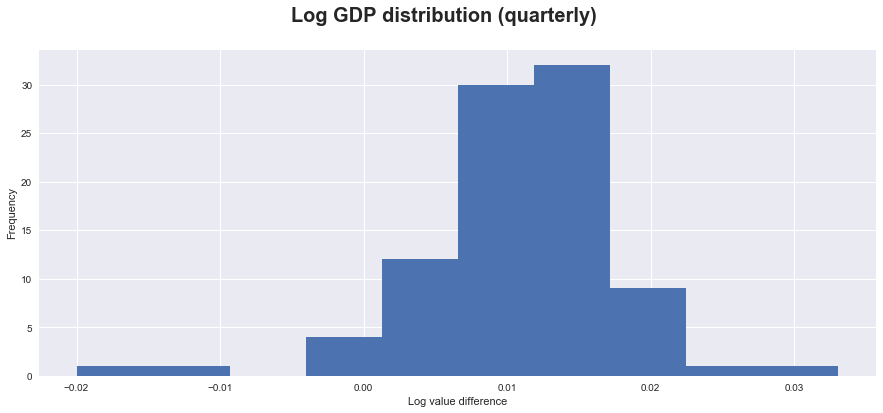

In [11]:
### Histogram of differences in values, quarterly log_GDP appears to have a normal distribution
fig = plt.figure()
fig.suptitle('Log GDP distribution (quarterly)', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Log value difference')
ax.set_ylabel('Frequency')
plt.hist(GDP_array)
#plt.savefig('Plots\Histograms\logGDP.png')
plt.show()

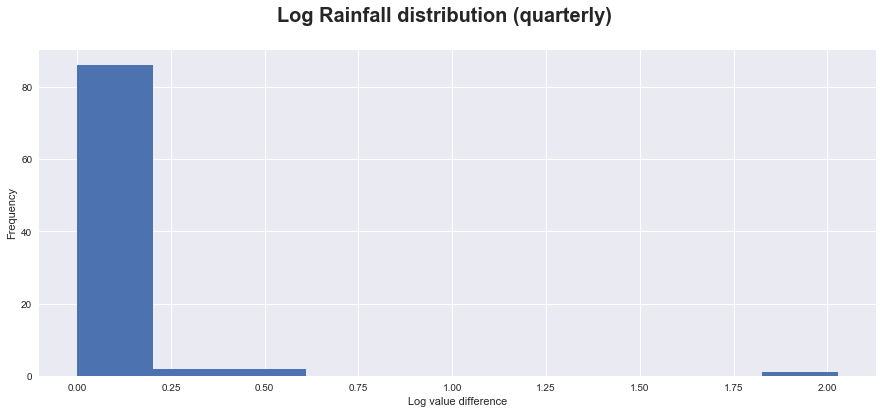

In [12]:
### Histogram of differences in values, quarterly log_rainfall appears to once again have a Gamma distribution
fig = plt.figure()
fig.suptitle('Log Rainfall distribution (quarterly)', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Log value difference')
ax.set_ylabel('Frequency')
plt.hist(qrain_array)
#plt.savefig('Plots\Histograms\lograin2.png')
plt.show()

In [13]:
#Calculates mean and standard deviation for log_M1 as well as log_rainfall (month data)
m1_mean = np.mean(m1_array)
m1_std = np.std(m1_array)

rainfall_mean = np.mean(rain_array)
rainfall_std = np.std(rain_array)

#Calculates mean and standard deviation for log_GDP as well as log_rainfall (quarter data)
GDP_mean = np.mean(GDP_array)
GDP_std = np.std(GDP_array)

qrain_mean = np.mean(qrain_array)
qrain_std = np.std(qrain_array)

# OLS and cointegration of Original data

Below the standard process that will be used for every simulation thereafter is showcased with just the original values from the CSV files. From the original data, unsurprisingly a spurious regression is already somewhat present. The key focus from this however was the cointegration test using the Dickey Fuller method. In the Dickey Fuller test we have $H_{0} = $ unit root present against the alternative in which $H_{a} =$ no unit root present (Dickey & Fuller, 1979). From this method a p-value of 0.1211 was acquired for money demand and a p-value of 0.2537 was acquired for GDP, both of them being significantly higher than 0.05 and hence a unit root process can be used in an attempt to better simulate this non-stationary series.

In [14]:
class original_m1:
    def __init__(self):
        pass
        
    def initiate(self):
        """
        Takes original values of log_M1 from CSV table, creates simulated value for rainfall 
        (size stays constant with data frame rows)
        """
        self.n = 281
        self.rain = np.array(month_data.iloc[:,6])
        self.lm1 = np.array(month_data.iloc[:, 5])

    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Original money demand/rainfall', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rain, color = 'lightskyblue', label = 'Rainfall')
        plt.plot(self.lm1, color = 'goldenrod', label = 'Money Demand')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='goldenrod', label='Money Demand')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\M1\line.png')
        return plt.show()
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Scatter money demand/rainfall', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Logarithmic Rainfall (CSV)')
        ax.set_ylabel('Logarithmic Money demand (CSV)')
        sct = sns.regplot(self.rain, self.lm1, color = 'salmon')
        #plt.savefig('Plots\M1\scatter.png')
        return plt.show()
        
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        du = pd.DataFrame(self.rain, self.lm1)
        self.result = sm.ols(formula = 'self.lm1 ~ self.rain', data = du).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rain)*self.rain)**-1
        y_mtx = np.transpose(self.rain)*self.lm1
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\M1\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\M1\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.lm1[t] + (self.betah[-1]*self.rain[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

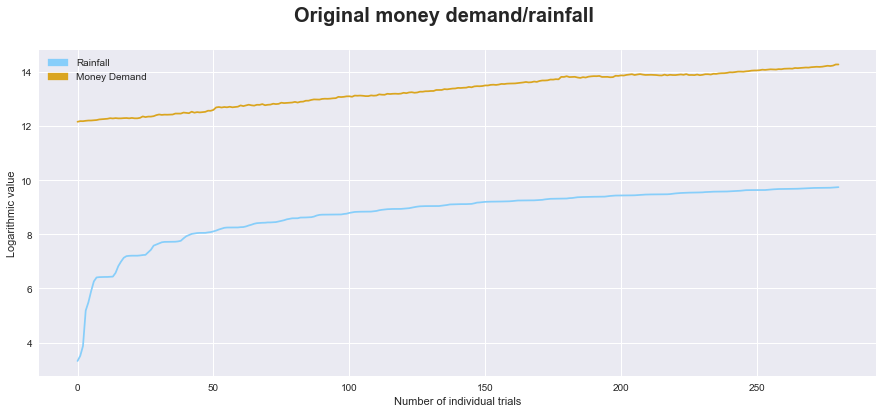

In [15]:
OG = original_m1()
OG.initiate()
OG.line_plot()

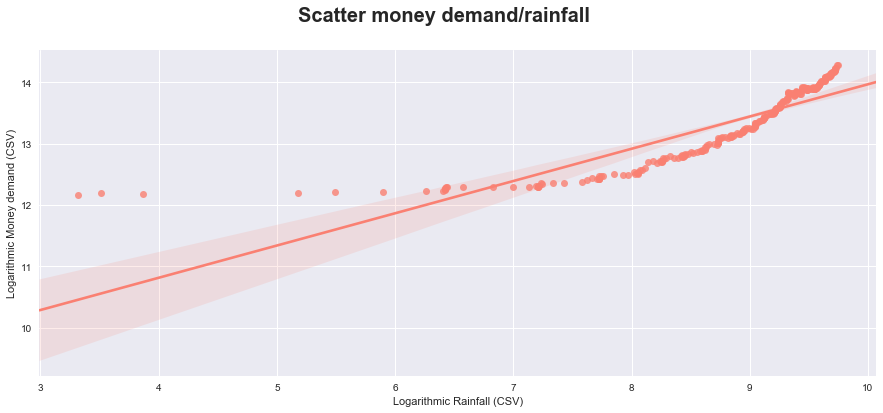

In [16]:
OG.scatter_plot()

In [17]:
OG.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               self.lm1   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     871.6
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           7.96e-88
Time:                        09:32:26   Log-Likelihood:                -64.717
No. Observations:                 281   AIC:                             133.4
Df Residuals:                     279   BIC:                             140.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7063      0.158     55.210      0.000       8.396       9.017
self.rain      0.5264      0.018     29.523      0.000       0.491       0.562
==============================================================================
Omnibus:                      109.425   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.523
Skew:                           1.515   Prob(JB):                    3.17e-122
Kurtosis:                       9.213   Cond. No.                         77.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

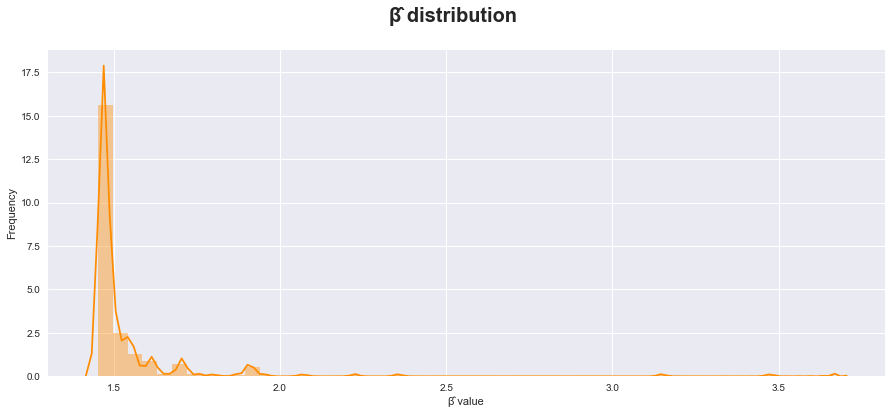

In [18]:
OG.ols()

<function matplotlib.pyplot.show>

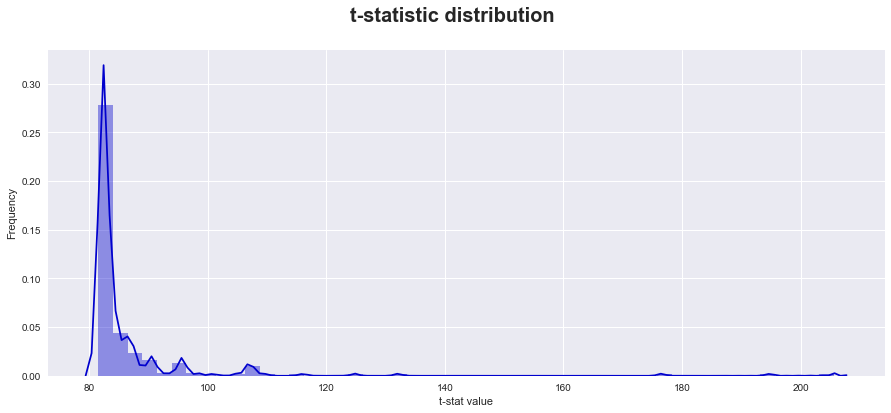

In [19]:
OG.t_stat()

In [20]:
OG.coint()

(-2.4774190388248236,
 0.12106562768399048,
 16,
 264,
 {'1%': -3.455365238788105,
  '10%': -2.5726375763314966,
  '5%': -2.8725510317187024},
 -1307.13950267855)

In [21]:
class original_GDP:
    def __init__(self):
        pass
        
    def initiate(self):
        """
        Takes original values of log_M1 from CSV table, creates simulated value for rainfall 
        (size stays constant with data frame rows)
        """
        self.n = 92
        self.rain = np.array(quarterly.iloc[:,5])
        self.gdp = np.array(quarterly.iloc[:, 4])

    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Original GDP/rainfall', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of samples')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rain, color = 'lightskyblue', label = 'Rainfall')
        plt.plot(self.gdp, color = 'goldenrod', label = 'Money Demand')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='goldenrod', label='Money Demand')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\GDP\line.png')
        return plt.show()
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('GDP and Rainfall', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Logarithmic Rainfall (CSV)')
        ax.set_ylabel('Logarithmic Money demand (CSV)')
        sct = sns.regplot(self.rain, self.gdp, color = 'salmon')
        #plt.savefig('Plots\GDP\scatter.png')
        return plt.show()
        
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        du = pd.DataFrame(self.rain, self.gdp)
        self.result = sm.ols(formula = 'self.gdp ~ self.rain', data = du).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rain)*self.rain)**-1
        y_mtx = np.transpose(self.rain)*self.gdp
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\GDP\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\GDP\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.gdp[t] + (self.betah[-1]*self.rain[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

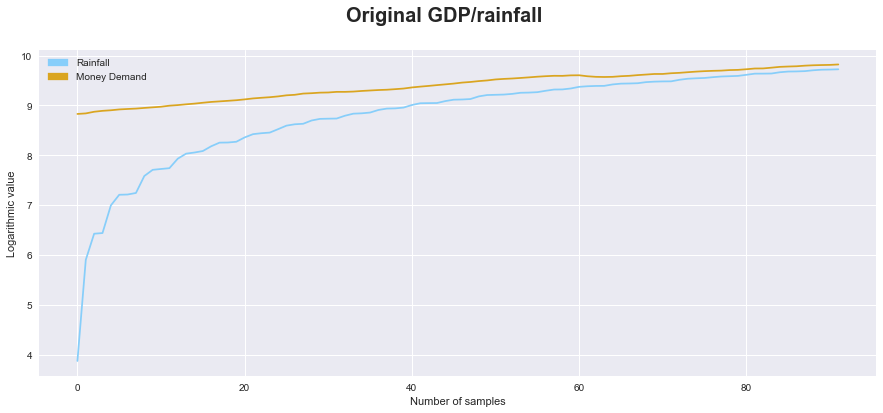

In [22]:
OGG = original_GDP()
OGG.initiate()
OGG.line_plot()

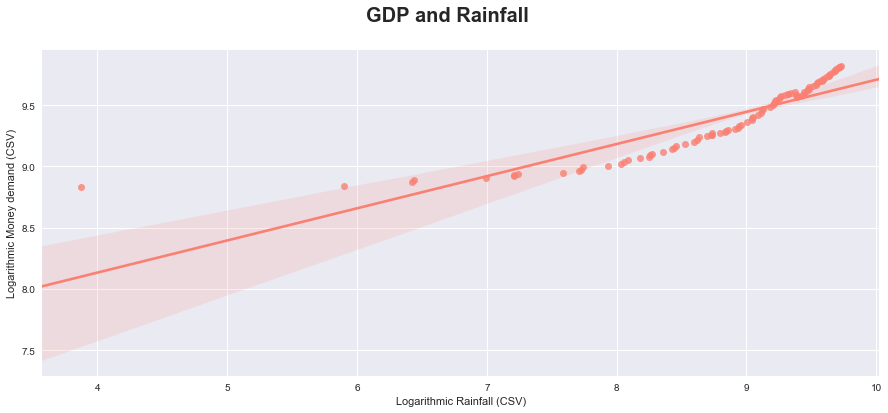

In [23]:
OGG.scatter_plot()

In [24]:
OGG.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               self.gdp   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     324.2
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.39e-31
Time:                        09:32:42   Log-Likelihood:                 54.623
No. Observations:                  92   AIC:                            -105.2
Df Residuals:                      90   BIC:                            -100.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0843      0.129     54.852      0.000       6.828       7.341
self.rain      0.2624      0.015     18.006      0.000       0.233       0.291
==============================================================================
Omnibus:                       51.846   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.577
Skew:                           1.711   Prob(JB):                     3.18e-56
Kurtosis:                      10.414   Cond. No.                         82.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

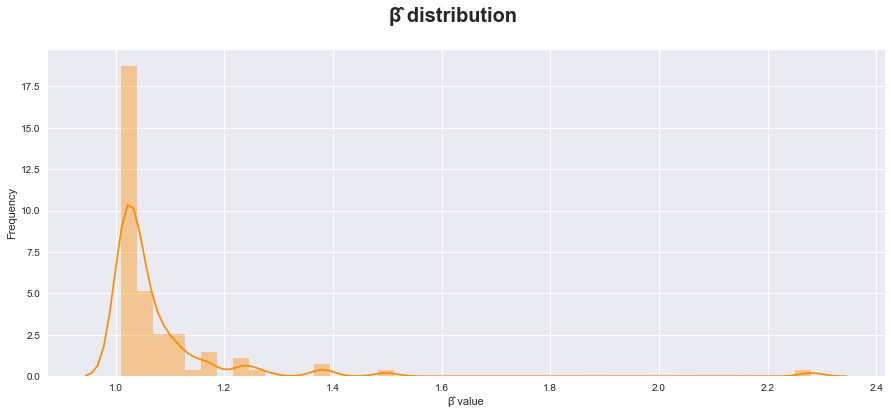

In [25]:
OGG.ols()

<function matplotlib.pyplot.show>

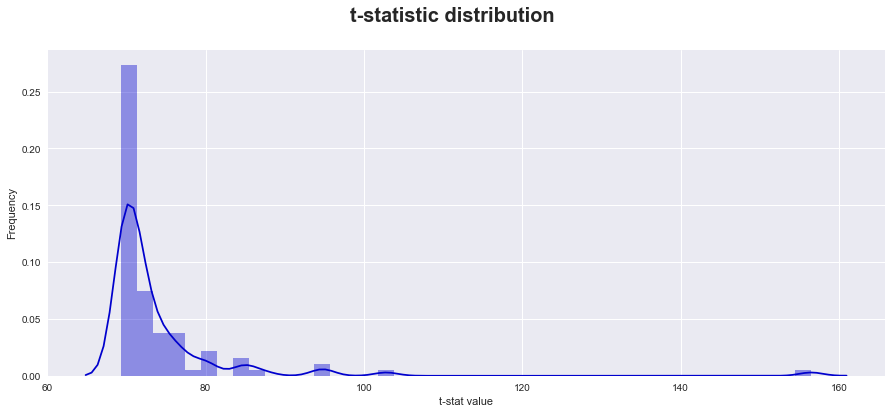

In [26]:
OGG.t_stat()

In [27]:
OGG.coint()

(-2.0773522954991153,
 0.25371831913035575,
 5,
 86,
 {'1%': -3.5087828609430614,
  '10%': -2.5850381719848565,
  '5%': -2.895783561573195},
 -461.89001922564614)

# Simulation

There are a total of 10 simulations, 5 for GDP and 5 for Money Demand with all simulations having an error term that possesses a lognormal distribution, with a mean of 0 and a variance of 1. Each simulation is carried out as a random walk $y_{t} = y_{t-1} + ε_{t}$. The first simulation (1) is purely carried out based on the values from the monthly and quarterly data respectively and simply adding the error term to them. The second simulation (2) is a simple regression of the original distribution of rainfall, as a random walk whilst keeping the original data for GDP and Money Demand.

The third simulation (3) is a bit more involved. It creates a lognormal distribution for all variables (rainfall, money demand and GDP), takes the differences between those values, saves them into an array and sets both $y_{0} = 0$ and $x_{0} = 0$. The assumption being made here is that rainfall, much like GDP and Money demand, has a normal distribution. In reality from the differences previously found, rainfall appears to take on a Gamma distribution. This simulation is a bit arbitrary in nature and was just seeing how different methods might impact the results.

The fourth simulation (4) creates a lognormal distribution for GDP and Money demand. It then calculates the $α$ and $β$ parameters for a suitable Gamma distribution of rainfall. The fifth simulation (5) builds on the fourth (4), it essentially carries out the exact same processes however it adds a trend term to the random walks being simulated, meaning $y_{t} = y_{t-1} + ε_{t}$ becomes $y_{t} = γ + y_{t-1} + ε_{t}$, with $γ$ taking on a set value in each iteration of the simulation.

The reasoning behind so many simulations is an attempt to better the model's accountability each time, making the spurious relationship become increasingly more apparent through the $R^{2}$ supposedly increasing with each simulation and the t-statistic also becoming increasingly larger and the Durbin-Watson value becoming non-existent. Two final simulations will also be carried out however instead of a simple linear model, it will be a multiple linear model meaning $y_{t} = α + β_{1}x_{1} + β_{2}x_{2} + ... + β_{j}x_{j} + ε_{t}$, where the $x_{t}$ terms are rainfall as well as multiple randomly generated lognormal distributions, using the parameters from the GDP distribution, the multiple linear regression will only be shown for GDP as it's believe that if it works for GDP it would conceptually work for Money Demand. The point of the Multiple Linear Regression is to hopefully be able to create a more sensible regression with more realistic results.

Behind each simulation a couple of assumptions are being made. The error terms for each random walk will be distributed in the for of $iid - N(0, \sigma^{2})$, iid meaning independently, identically distributed. Each random walk will only be in the form of I(1) meaning that the current value for any variable will be dependent on the previous value with the error term added on. Money demand, GDP and rainfall are all values that in realistically in nature should never be negative, for this reason lognormal is used rather than normal distribution. The initial values in each vector will be set to 0, this is to create an unbiased starting point for each variable. Lastly we will be under the assumption that Simple Linear Regression is the best possible model and that OLS is the most optimal solution to the problem, this is mostly due to other models being beyond the scope of what we understand at the current time.

In [28]:
class  month_random:
    def __init__(self):
        pass
    
    def month_random_walk_initiate(self):
        """
        Creates random walks of values based on monthly data,
        Log normal distribution used in order to keep all values positive.
        """
        self.n = 281
        self.rain = np.array(month_data.iloc[:,6])
        self.m1 = np.array(month_data.iloc[:,5])
        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.rain[t] = self.rain[t-1] + x[t]
        for t in range(self.n):
            self.m1[t] = self.m1[t-1] + y[t]
        return
    
    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walks (lognormal)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rain, color = 'lightskyblue')
        plt.plot(self.m1, color = 'goldenrod')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='goldenrod', label='Money Demand')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Simulated month\line.png')
        return 
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Scatter Random walk', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Logarithmic Rainfall (random)')
        ax.set_ylabel('Logarithmic Money demand (random)')
        sct = sns.regplot(self.rain, self.m1, color = 'salmon')
        #plt.savefig('Plots\Simulated month\scatter.png')
        return plt.show
        
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        df = pd.DataFrame(self.rain, self.m1)
        self.result = sm.ols(formula = 'self.m1 ~ self.rain', data = df).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rain)*self.rain)**-1
        y_mtx = np.transpose(self.rain)*self.m1
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Simulated month\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Simulated month\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.m1[t] + (self.betah[-1]*self.rain[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

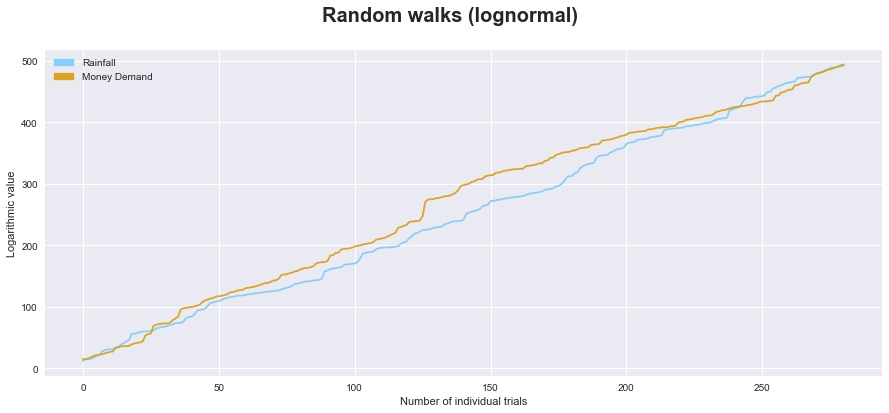

In [29]:
monthly = month_random()
monthly.month_random_walk_initiate()
monthly.line_plot()

<function matplotlib.pyplot.show>

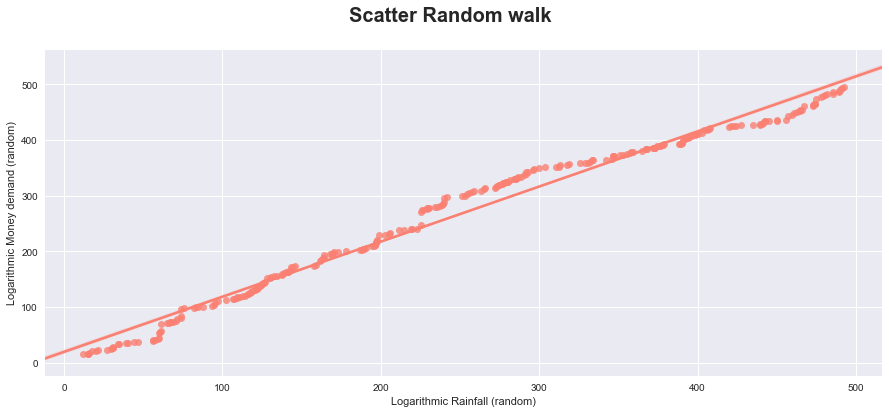

In [30]:
monthly.scatter_plot()

In [31]:
monthly.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                self.m1   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.546e+04
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          2.30e-246
Time:                        09:33:15   Log-Likelihood:                -1219.6
No. Observations:                 281   AIC:                             2443.
Df Residuals:                     279   BIC:                             2450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3252      2.289      8.441      0.000      14.819      23.832
self.rain      0.9899      0.008    124.344      0.000       0.974       1.006
==============================================================================
Omnibus:                       19.613   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.063
Skew:                           0.321   Prob(JB):                      0.00396
Kurtosis:                       2.270   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

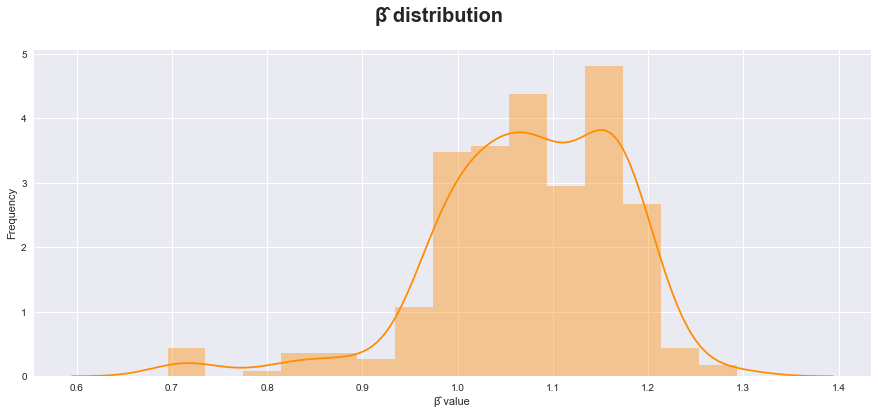

In [32]:
monthly.ols()

<function matplotlib.pyplot.show>

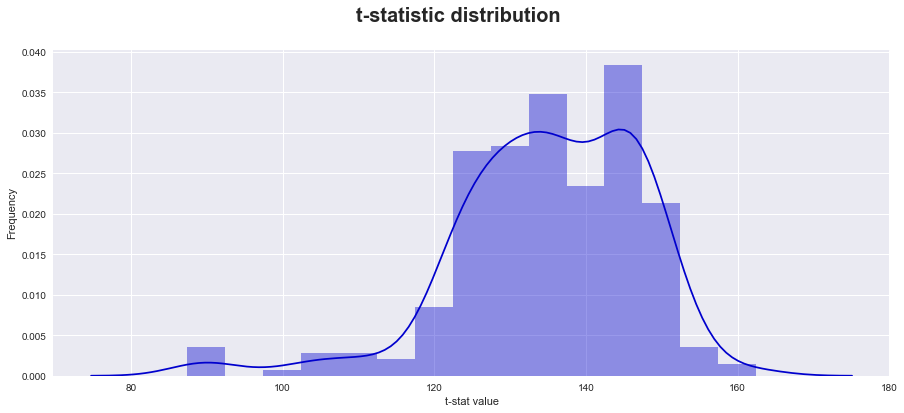

In [33]:
monthly.t_stat()

In [34]:
monthly.coint()

(-1.0274606315931045,
 0.7431173879507538,
 0,
 280,
 {'1%': -3.453922368485787,
  '10%': -2.5723001147959184,
  '5%': -2.871918329081633},
 1312.3941395345473)

In [35]:
class Random_rain:
    def __init__(self):
        pass
        
    def rain_m1_random_walk_initiate(self):
        """
        Takes original values of log_M1 from CSV table, creates simulated value for rainfall 
        (size stays constant with data frame rows)
        """
        self.n = 281
        self.rain = np.array(month_data.iloc[:,6])
        x = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.rain[t] = self.rain[t-1] + x[t]
        return 

    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walk for Rainfall', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rain, color = 'lightskyblue', label = 'Rainfall')
        plt.plot(lm1, color = 'goldenrod', label = 'Money Demand')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='goldenrod', label='Money Demand')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Simulated rain\line.png')
        return plt.show()
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        #return plt.scatter(self.rain,lm1)
        fig = plt.figure()
        fig.suptitle('Scatter Random walk for Rainfall', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Logarithmic Rainfall (random)')
        ax.set_ylabel('Logarithmic Money demand (CSV)')
        sct = sns.regplot(self.rain, lm1, color = 'salmon')
        #plt.savefig('Plots\Simulated rain\scatter.png')
        return plt.show()
        
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        du = pd.DataFrame(self.rain, lm1)
        self.result = sm.ols(formula = 'lm1 ~ self.rain', data = du).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rain)*self.rain)**-1
        y_mtx = np.transpose(self.rain)*lm1
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Simulated rain\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Simulated rain\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = lm1[t] + (self.betah[-1]*self.rain[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

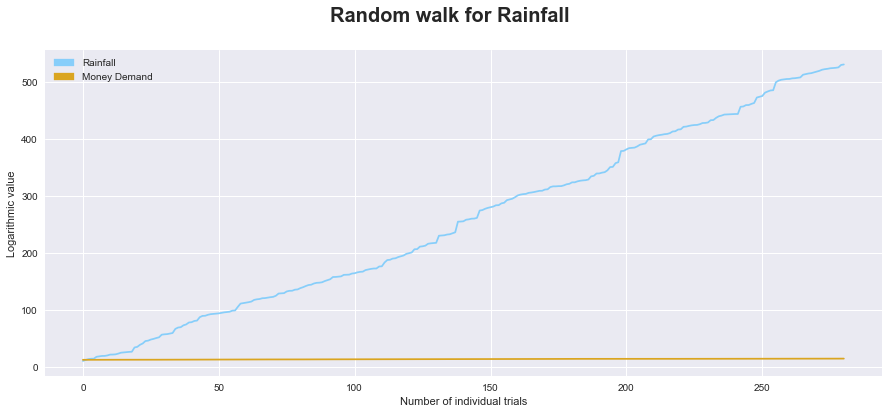

In [36]:
RR = Random_rain() 
RR.rain_m1_random_walk_initiate()
RR.line_plot()

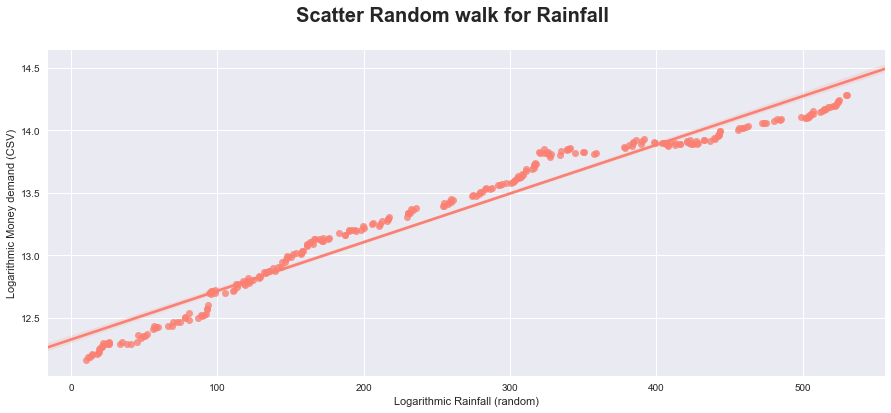

In [37]:
RR.scatter_plot()

In [38]:
RR.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lm1   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     6851.
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          2.21e-198
Time:                        09:33:28   Log-Likelihood:                 191.55
No. Observations:                 281   AIC:                            -379.1
Df Residuals:                     279   BIC:                            -371.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3258      0.014    869.177      0.000      12.298      12.354
self.rain      0.0039   4.71e-05     82.769      0.000       0.004       0.004
==============================================================================
Omnibus:                      346.449   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.213
Skew:                           0.006   Prob(JB):                     4.08e-05
Kurtosis:                       1.686   Cond. No.                         583.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

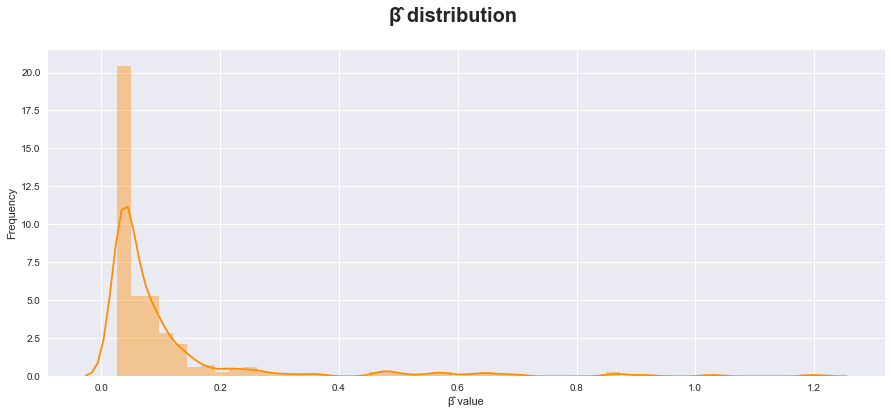

In [39]:
RR.ols()

<function matplotlib.pyplot.show>

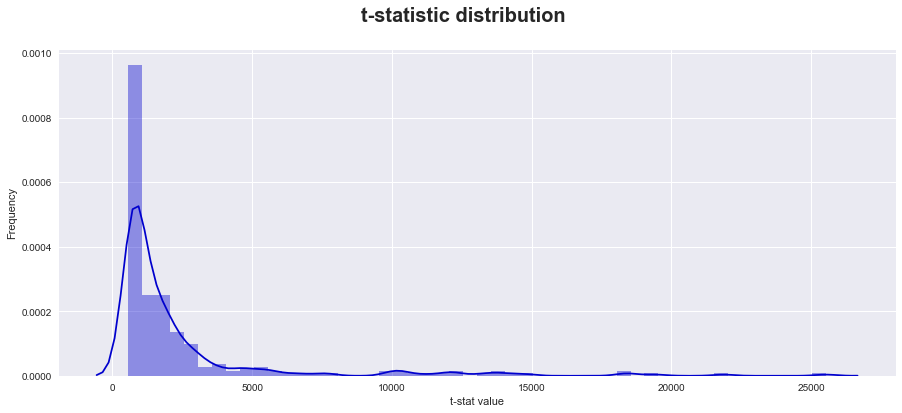

In [40]:
RR.t_stat()

In [41]:
RR.coint()

(0.6210733093039825,
 0.9881236949898385,
 1,
 279,
 {'1%': -3.4540076534999957,
  '10%': -2.5723200648758366,
  '5%': -2.8719557347997178},
 -629.7790334595867)

In [42]:
class lognormal_simulation:
    def __init__(self):
        pass
    
    def lognormal_rain_initiate(self, sample = 1000):
        """
        Creates randomized lognormal variables of variables log rainfall and log M1, finds the difference between values,
        replaces first index of array with 0, creates random walks of variables
        sample = amount of trials to be carried out (default = 1000)
        """
        self.n = sample
        random_rainfall = np.zeros(self.n)
        random_rainfall = np.random.lognormal(rainfall_mean, rainfall_std, self.n)
        self.rainfall_array = np.diff(random_rainfall)
        self.rainfall_array = self.rainfall_array[~np.isnan(self.rainfall_array)]
        self.rainfall_array = np.insert(self.rainfall_array,0,0)

        random_m1 = np.zeros(self.n)
        random_m1 = np.random.lognormal(m1_mean, m1_std, self.n)
        self.M1_array = np.diff(random_m1)
        self.M1_array = self.M1_array[~np.isnan(self.M1_array)]
        self.M1_array = np.insert(self.M1_array,0,0)

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.rainfall_array[t] = self.rainfall_array[t-1] + x[t]
        for t in range(self.n):
            self.M1_array[t] = self.M1_array[t-1] + y[t]
        return 
    
    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walk (lognormal difference)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rainfall_array, color = 'lightskyblue')
        plt.plot(self.M1_array, color = 'goldenrod')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='goldenrod', label='Money Demand')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Sim log month\line.png')
        return plt.show()
        
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Logarithmic difference Random walk', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Logarithmic Rainfall (random)')
        ax.set_ylabel('Logarithmic Money demand (random)')
        sct = sns.regplot(self.rainfall_array, self.M1_array, color = 'salmon')
        #plt.savefig('Plots\Sim log month\scatter.png')
        return plt.show
        
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        df = pd.DataFrame(self.rainfall_array, self.M1_array)
        self.result = sm.ols(formula = 'self.M1_array ~ self.rainfall_array', data = df).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rainfall_array)*self.rainfall_array)**-1
        y_mtx = np.transpose(self.rainfall_array)*self.M1_array
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Sim log month\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Sim log month\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.M1_array[t] + (self.betah[-1]*self.rainfall_array[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

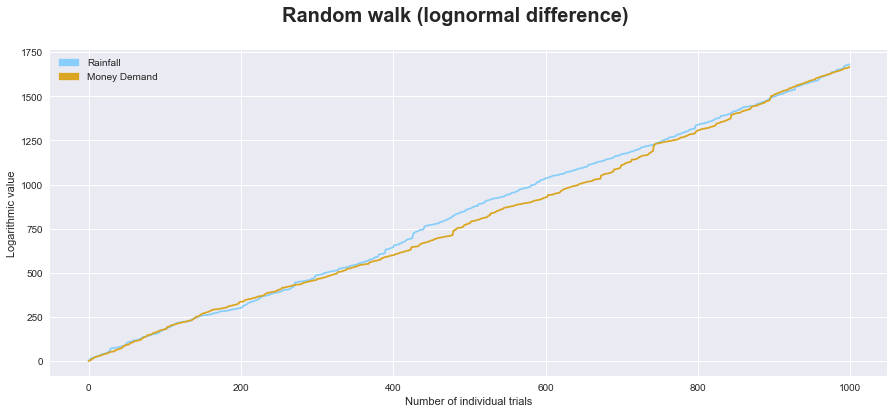

In [43]:
Sim1 = lognormal_simulation()
Sim1.lognormal_rain_initiate()
Sim1.line_plot()

<function matplotlib.pyplot.show>

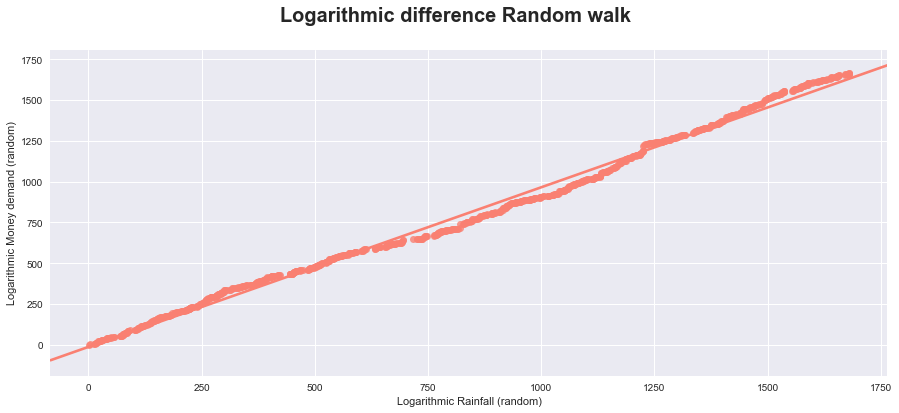

In [44]:
Sim1.scatter_plot()

In [45]:
Sim1.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          self.M1_array   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.572e+05
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:33:45   Log-Likelihood:                -5049.8
No. Observations:                1000   AIC:                         1.010e+04
Df Residuals:                     998   BIC:                         1.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -12.8813      2.381     -5.411      0.000     -17.553      -8.209
self.rainfall_array     0.9788      0.002    396.457      0.000       0.974       0.984
==============================================================================
Omnibus:                      357.878   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.500
Skew:                          -0.409   Prob(JB):                     2.44e-17
Kurtosis:                       1.919   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

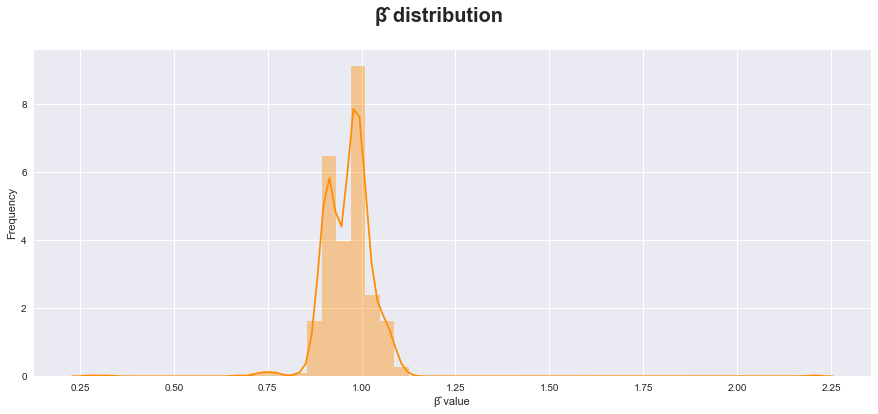

In [46]:
Sim1.ols()

<function matplotlib.pyplot.show>

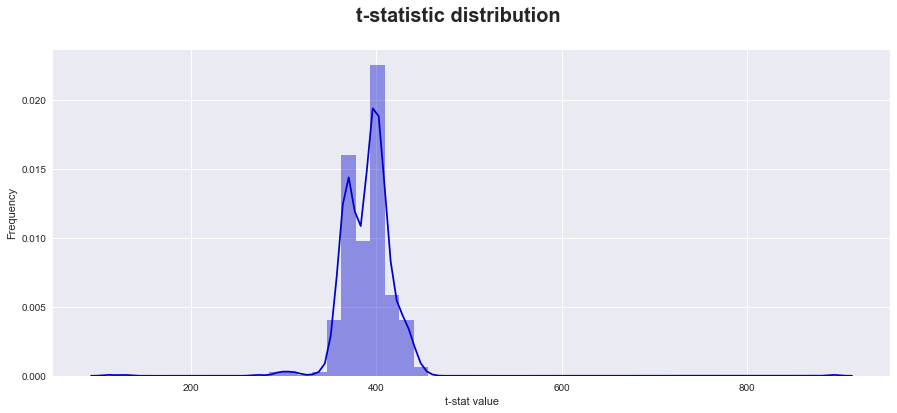

In [47]:
Sim1.t_stat()

In [48]:
Sim1.coint()

(1.2372395723579286,
 0.9962333399243433,
 0,
 999,
 {'1%': -3.4369127451400474,
  '10%': -2.568312754566378,
  '5%': -2.864437475834273},
 5025.344526311452)

In [49]:
class gamma_simulation:
    def __init__(self):
        pass
    
    def gamma_normal_initiate(self, sample = 1000):
        """
        Creates a gamma random variable for rainfall and a lognormal distribution of M1,
        random walks are then generated based on randomly creates variables.
        sample = amount of trials to be carried out (default = 1000)
        """
        alpha = (rainfall_mean/rainfall_std)**2
        beta = (rainfall_std**2) / rainfall_mean
        self.n = sample
        
        self.rd_rainfall = np.zeros(self.n)
        self.rd_rainfall = np.random.gamma(alpha, beta, self.n)
        self.rd_rainfall[0] = 0

        self.random_m1 = np.zeros(self.n)
        self.random_m1 = np.random.lognormal(m1_mean, m1_mean, self.n)
        self.random_m1[0] = 0

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.rd_rainfall[t] = self.rd_rainfall[t-1] + x[t]

        for t in range(self.n):
            self.random_m1[t] = self.random_m1[t-1] + y[t]
        return
    
    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walk (gamma)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rd_rainfall, color = 'lightskyblue')
        plt.plot(self.random_m1, color = 'goldenrod')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='goldenrod', label='Money Demand')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Sim gamma month\line.png')
        return plt.show()
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Random walk simulation (Gamma)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Gamma Rainfall (random)')
        ax.set_ylabel('Logarithmic Money demand (random)')
        sct = sns.regplot(self.rd_rainfall, self.random_m1, color = 'salmon')
        #plt.savefig('Plots\Sim gamma month\scatter.png')
        return plt.show
    
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        da = pd.DataFrame(self.rd_rainfall, self.random_m1)
        self.result = sm.ols(formula = 'self.random_m1 ~ self.rd_rainfall', data = da).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rd_rainfall)*self.rd_rainfall)**-1
        y_mtx = np.transpose(self.rd_rainfall)*self.random_m1
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Sim gamma month\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Sim gamma month\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.random_m1[t] + (self.betah[-1]*self.rd_rainfall[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

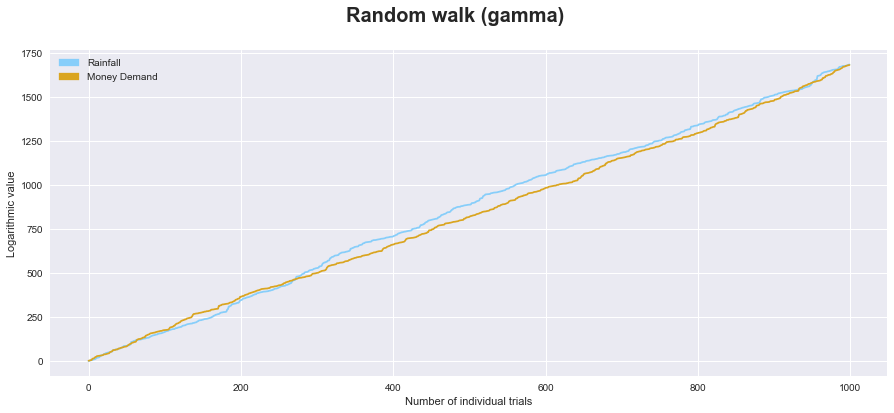

In [50]:
Sim2 = gamma_simulation()
Sim2.gamma_normal_initiate()
Sim2.line_plot()

<function matplotlib.pyplot.show>

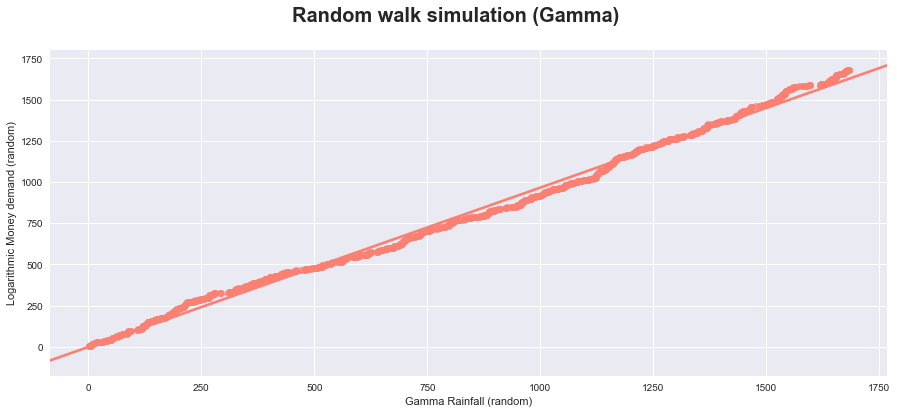

In [51]:
Sim2.scatter_plot()

In [52]:
Sim2.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         self.random_m1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.021e+05
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:33:58   Log-Likelihood:                -4910.8
No. Observations:                1000   AIC:                             9826.
Df Residuals:                     998   BIC:                             9835.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.1728      2.115     -0.555      0.579      -5.323       2.977
self.rd_rainfall     0.9671      0.002    449.611      0.000       0.963       0.971
==============================================================================
Omnibus:                      434.741   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.361
Skew:                          -0.099   Prob(JB):                     1.57e-12
Kurtosis:                       1.875   Cond. No.                     2.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

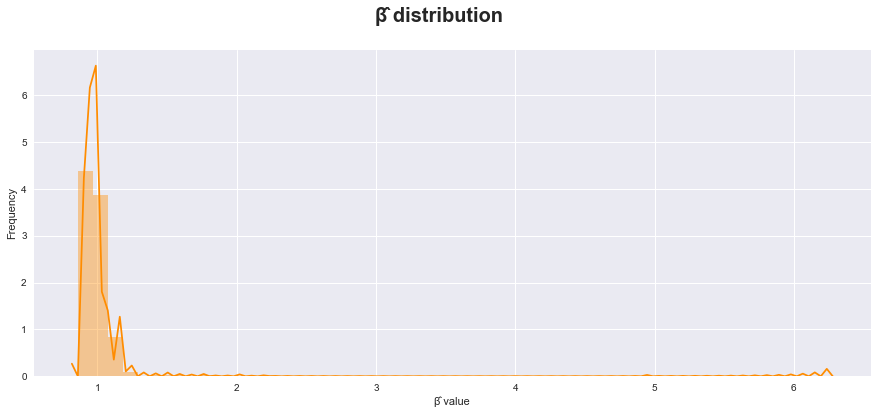

In [53]:
Sim2.ols()

<function matplotlib.pyplot.show>

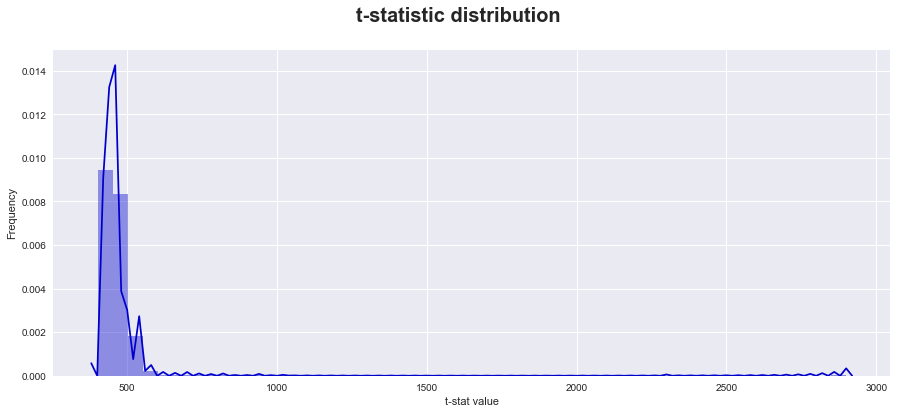

In [54]:
Sim2.t_stat()

In [55]:
Sim2.coint()

(-0.034636783881388696,
 0.9555721807661763,
 0,
 999,
 {'1%': -3.4369127451400474,
  '10%': -2.568312754566378,
  '5%': -2.864437475834273},
 4705.350848198352)

In [56]:
class month_gamma_trend:
    def __init__(self):
        pass
    
    def gamma_normal_initiate(self, sample = 1000, trend = 0.1):
        """
        Creates a gamma random variable for rainfall and a lognormal random variable of M1,
        random walks are then generated based on randomly creates variable with a trending term.
        sample = number of simulations (default is 1000)
        trend = trend factor to add to each random walk (default is 0.1)
        """
        alpha = (rainfall_mean/rainfall_std)**2
        beta = (rainfall_std**2) / rainfall_mean
        self.n = sample
        
        self.rd_rainfall = np.zeros(self.n)
        self.rd_rainfall = np.random.gamma(alpha, beta, self.n)
        self.rd_rainfall[0] = 0

        self.random_m1 = np.zeros(self.n)
        self.random_m1 = np.random.lognormal(m1_mean, m1_mean, self.n)
        self.random_m1[0] = 0

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.rd_rainfall[t] = trend + self.rd_rainfall[t-1] + x[t]

        for t in range(self.n):
            self.random_m1[t] = trend + self.random_m1[t-1] + y[t]
        return
    
    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walk (w/ trend)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rd_rainfall, color = 'lightskyblue')
        plt.plot(self.random_m1, color = 'goldenrod')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='goldenrod', label='Money Demand')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Trend money\line.png')
        return plt.show()
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Random walk simulation (w/ trend))', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Gamma Rainfall (random)')
        ax.set_ylabel('Logarithmic Money demand (random)')
        sct = sns.regplot(self.rd_rainfall, self.random_m1, color = 'salmon')
        #plt.savefig('Plots\Trend money\scatter.png')
        return plt.show
    
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        da = pd.DataFrame(self.rd_rainfall, self.random_m1)
        self.result = sm.ols(formula = 'self.random_m1 ~ self.rd_rainfall', data = da).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rd_rainfall)*self.rd_rainfall)**-1
        y_mtx = np.transpose(self.rd_rainfall)*self.random_m1
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Trend money\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Trend Money\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.random_m1[t] + (self.betah[-1]*self.rd_rainfall[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

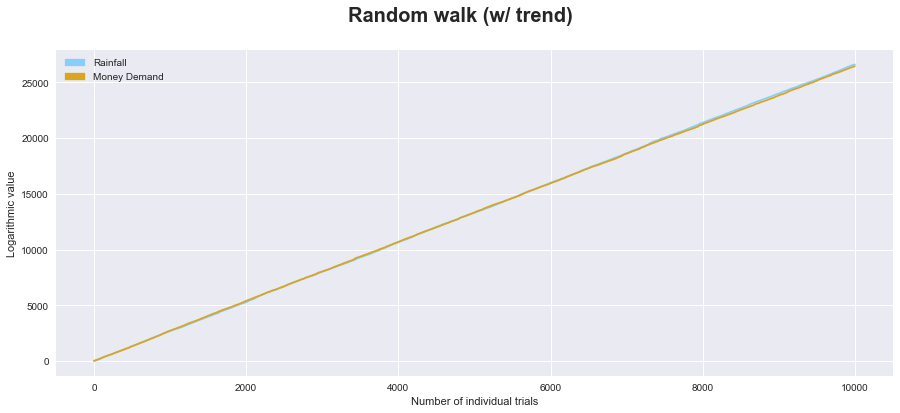

In [57]:
mgt = month_gamma_trend()
mgt.gamma_normal_initiate(10000,1)
mgt.line_plot()

<function matplotlib.pyplot.show>

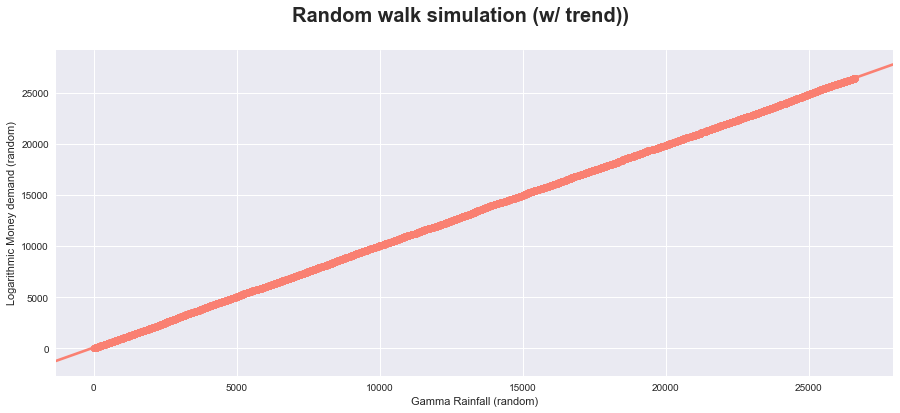

In [58]:
mgt.scatter_plot()

In [59]:
mgt.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         self.random_m1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.458e+08
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:34:20   Log-Likelihood:                -53042.
No. Observations:               10000   AIC:                         1.061e+05
Df Residuals:                    9998   BIC:                         1.061e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           88.8097      0.973     91.262      0.000      86.902      90.717
self.rd_rainfall     0.9912   6.32e-05   1.57e+04      0.000       0.991       0.991
==============================================================================
Omnibus:                      223.100   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.206
Skew:                          -0.148   Prob(JB):                     5.91e-31
Kurtosis:                       2.504   Cond. No.                     3.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

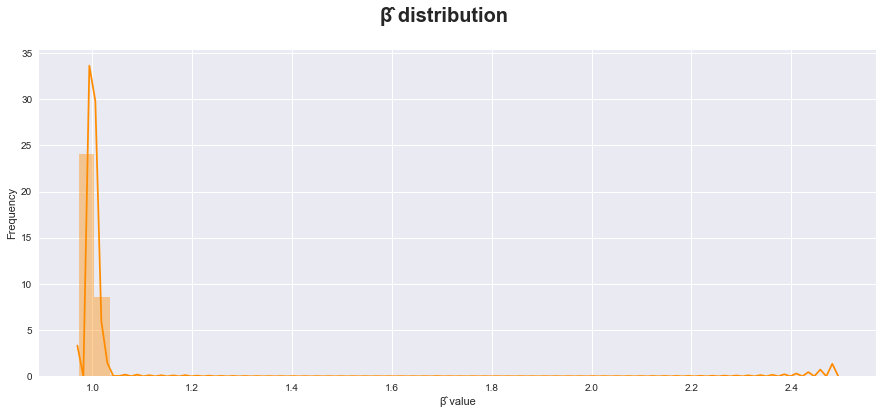

In [60]:
mgt.ols()

<function matplotlib.pyplot.show>

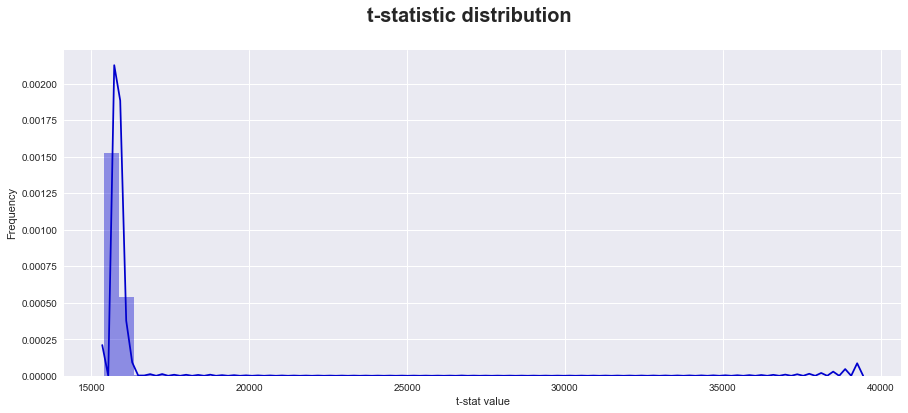

In [61]:
mgt.t_stat()

In [62]:
mgt.coint()

(-0.9933514906871914,
 0.7556814615969694,
 0,
 9999,
 {'1%': -3.4310041633725734,
  '10%': -2.566923883481157,
  '5%': -2.861829101294412},
 50161.159797758984)

# Quarterly data

In [63]:
class quarter:
    def __init__(self):
        pass
    
    def qrandom_walk_initiate(self):
        """
        Creates random walks for both variables.
        """
        self.n = 92
        self.GDP = np.array(quarterly.iloc[:,4])
        self.rain = np.array(quarterly.iloc[:,5])

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.GDP[t] = self.GDP[t-1] + x[t]
        for t in range(self.n):
            self.rain[t] = self.rain[t-1] + y[t]
        return 

    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walk (lognormal)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rain, color = 'lightskyblue')
        plt.plot(self.GDP, color = 'peru')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='peru', label='GDP')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Sim quarter\line.png')
        return plt.show()

    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Random walk (CSV values)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Logarithmic Rainfall (CSV)')
        ax.set_ylabel('Logarithmic GDP (CSV)')
        sct = sns.regplot(self.rain, self.GDP, color = 'salmon')
        #plt.savefig('Plots\Sim quarter\scatter.png')
        return plt.show
    
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        df = pd.DataFrame(self.rain, self.GDP)
        self.result = sm.ols(formula = 'self.GDP ~ self.rain', data = df).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rain)*self.rain)**-1
        y_mtx = np.transpose(self.rain)*self.GDP
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Sim quarter\ols.png')
        return plt.show()

    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Sim quarter\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.GDP[t] + (self.betah[-1]*self.rain[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

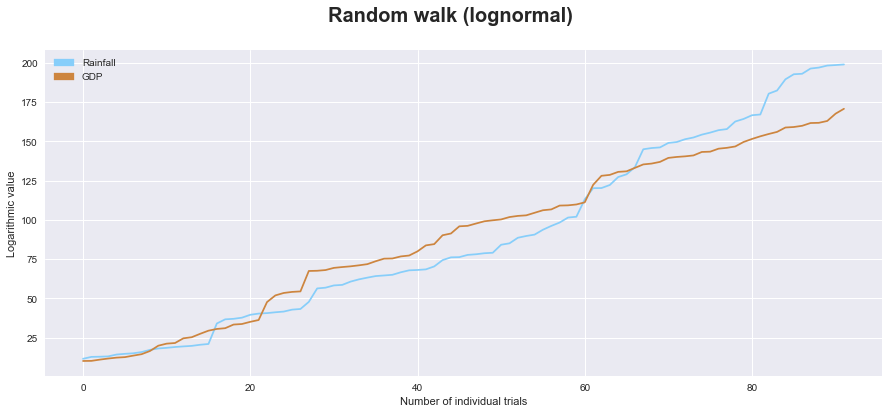

In [64]:
qut = quarter()
qut.qrandom_walk_initiate()
qut.line_plot()

<function matplotlib.pyplot.show>

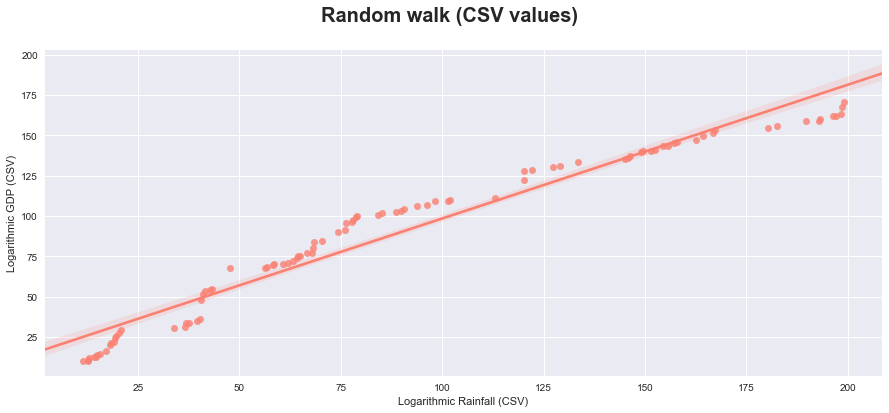

In [65]:
qut.scatter_plot()

In [66]:
qut.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               self.GDP   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1822.
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.62e-61
Time:                        09:34:42   Log-Likelihood:                -348.27
No. Observations:                  92   AIC:                             700.5
Df Residuals:                      90   BIC:                             705.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4640      2.080      7.434      0.000      11.331      19.597
self.rain      0.8295      0.019     42.683      0.000       0.791       0.868
==============================================================================
Omnibus:                       35.480   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.017
Skew:                          -0.096   Prob(JB):                       0.0494
Kurtosis:                       1.762   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

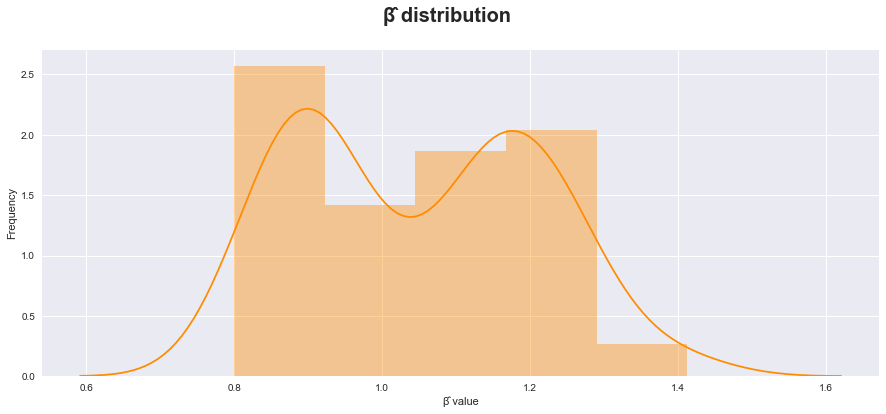

In [67]:
qut.ols()

<function matplotlib.pyplot.show>

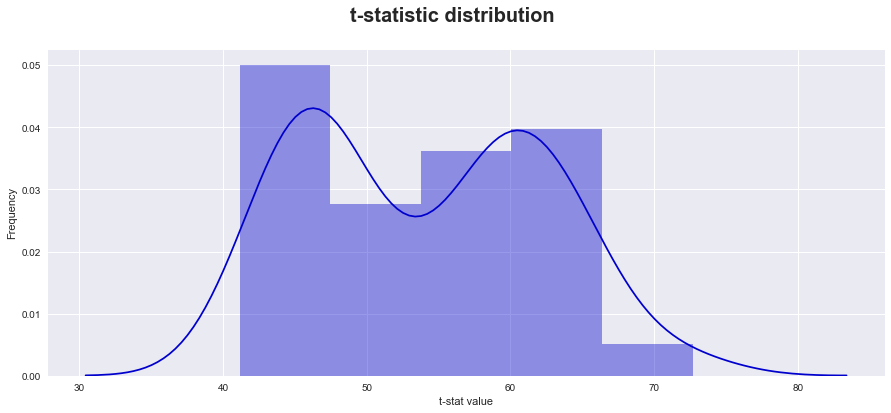

In [68]:
qut.t_stat()

In [69]:
qut.coint()

(1.2096090596731977,
 0.9960516048856791,
 0,
 91,
 {'1%': -3.50434289821397,
  '10%': -2.5840147047458037,
  '5%': -2.8938659630479413},
 427.92302088145465)

In [70]:
class quarter_random:
    def __init__(self):
        pass
    
    def rain_random_walk_initiate(self):
        """
        Creates random walk variable for rain only.
        """
        self.n = 92
        self.rainfall = np.array(quarterly.iloc[:,5])
        x = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.rainfall[t] = self.rainfall[t-1] + x[t]
        return
    
    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walk of rainfall', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rainfall, color = 'lightskyblue')
        plt.plot(lGDP, color = 'peru')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='peru', label='GDP')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Sim rainfall q\line.png')
        return plt.show()
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Rain random walk (CSV values)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Logarithmic Rainfall (random)')
        ax.set_ylabel('Logarithmic GDP (CSV)')
        sct = sns.regplot(self.rainfall, lGDP, color = 'salmon')
        #plt.savefig('Plots\Sim rainfall q\scatter.png')
        return plt.show

    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        du = pd.DataFrame(self.rainfall, lGDP)
        self.result = sm.ols(formula = 'lGDP ~ self.rainfall', data = du).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rainfall)*self.rainfall)**-1
        y_mtx = np.transpose(self.rainfall)*lGDP
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Sim rainfall q\ols.png')
        return plt.show()

    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Sim rainfall q\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = lGDP[t] + (self.betah[-1]*self.rainfall[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

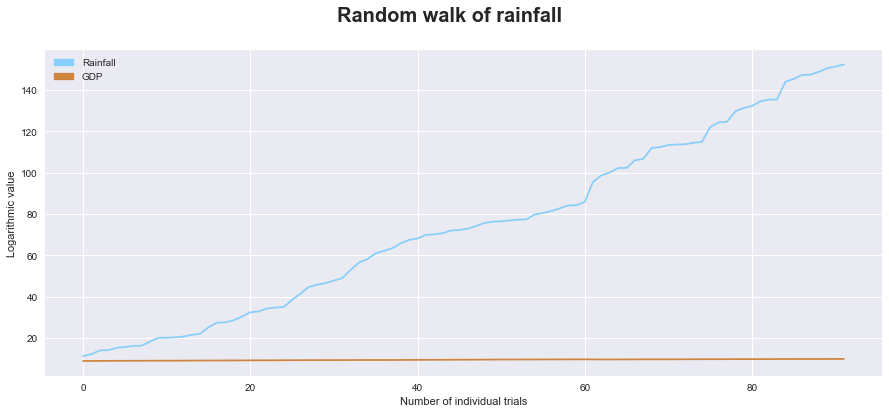

In [71]:
qq = quarter_random()
qq.rain_random_walk_initiate()
qq.line_plot()

<function matplotlib.pyplot.show>

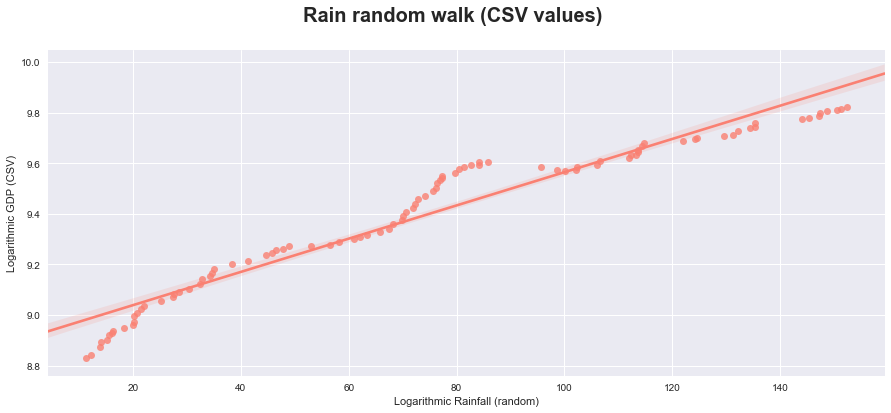

In [72]:
qq.scatter_plot()

In [73]:
qq.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lGDP   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1426.
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           5.54e-57
Time:                        09:35:08   Log-Likelihood:                 114.31
No. Observations:                  92   AIC:                            -224.6
Df Residuals:                      90   BIC:                            -219.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.9077      0.015    598.766      0.000       8.878       8.937
self.rainfall     0.0066      0.000     37.765      0.000       0.006       0.007
==============================================================================
Omnibus:                        1.645   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.678
Skew:                           0.303   Prob(JB):                        0.432
Kurtosis:                       2.733   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

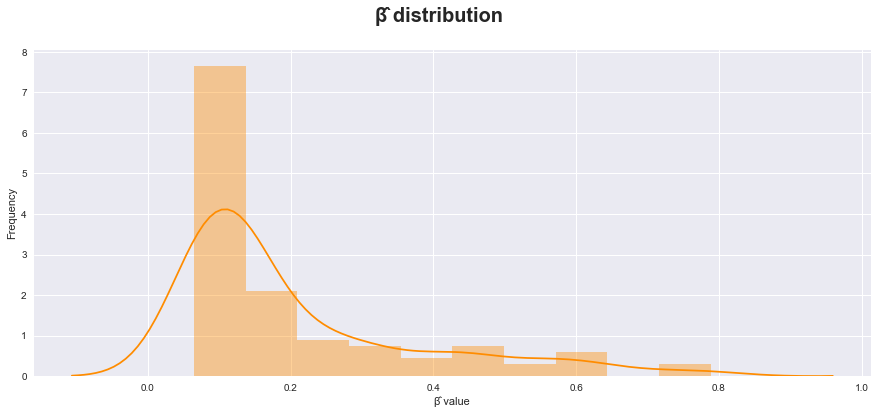

In [74]:
qq.ols()

<function matplotlib.pyplot.show>

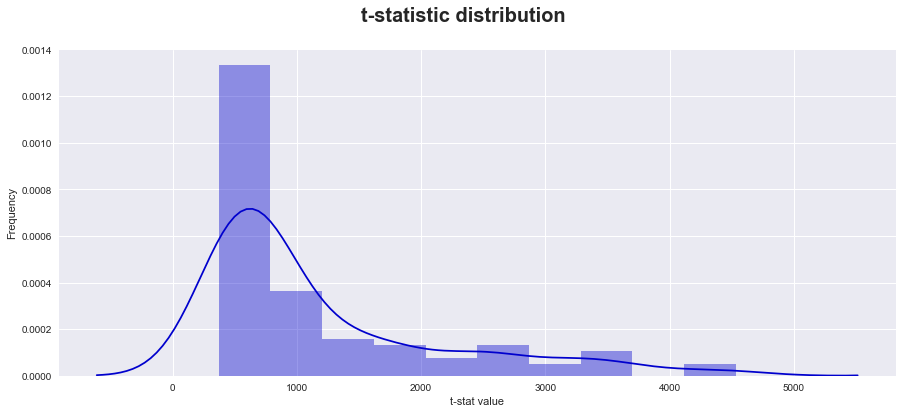

In [75]:
qq.t_stat()

In [76]:
qq.coint()

(1.1904281221729134,
 0.9959190787678733,
 0,
 91,
 {'1%': -3.50434289821397,
  '10%': -2.5840147047458037,
  '5%': -2.8938659630479413},
 -116.19146187177105)

In [77]:
#Simulates 1000 values of a normal distribution for log_rainfall based on parameters previously calculated
#Calculates difference between arrays, inserts a 0 value at start of array
class lognormal_gdp:
    def __init__(self):
        pass
    
    def lognormal_gdp_initiate(self, sample = 1000):
        """
        Creates randomized lognormal variables of variables log rainfall and log GDP, finds the difference between values,
        replaces first index of array with 0, creates random walks of variables
        """
        self.n = sample
        rand_rainfall = np.zeros(self.n)
        rand_rainfall = np.random.lognormal(qrain_mean, qrain_std, self.n)
        self.rainfall = np.diff(rand_rainfall)
        self.rainfall = self.rainfall[~np.isnan(self.rainfall)]
        self.rainfall = np.insert(self.rainfall,0,0)

        random_GDP = np.zeros(self.n)
        random_GDP = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.GDP_array = np.diff(random_GDP)
        self.GDP_array = self.GDP_array[~np.isnan(self.GDP_array)]
        self.GDP_array = np.insert(self.GDP_array,0,0)

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.rainfall[t] = self.rainfall[t-1] + x[t]
        for t in range(self.n):
            self.GDP_array[t] = self.GDP_array[t-1] + y[t]
        return
    
    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Logarithmic difference random walk', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.rainfall, color = 'lightskyblue')
        plt.plot(self.GDP_array, color = 'peru')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='peru', label='GDP')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Sim log quarter\line.png')
        return plt.show()
    
    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Logarithmic difference random walk', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Logarithmic Rainfall (random)')
        ax.set_ylabel('Logarithmic GDP (random)')
        sct = sns.regplot(self.rainfall, self.GDP_array, color = 'salmon')
        #plt.savefig('Plots\Sim log quarter\scatter.png')
        return plt.show

    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        df = pd.DataFrame(self.rainfall, self.GDP_array)
        self.result = sm.ols(formula = 'self.GDP_array ~ self.rainfall', data = df).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.rainfall)*self.rainfall)**-1
        y_mtx = np.transpose(self.rainfall)*self.GDP_array
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Sim log quarter\ols.png')
        return plt.show()

    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Sim log quarter\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.GDP_array[t] + (self.betah[-1]*self.rainfall[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

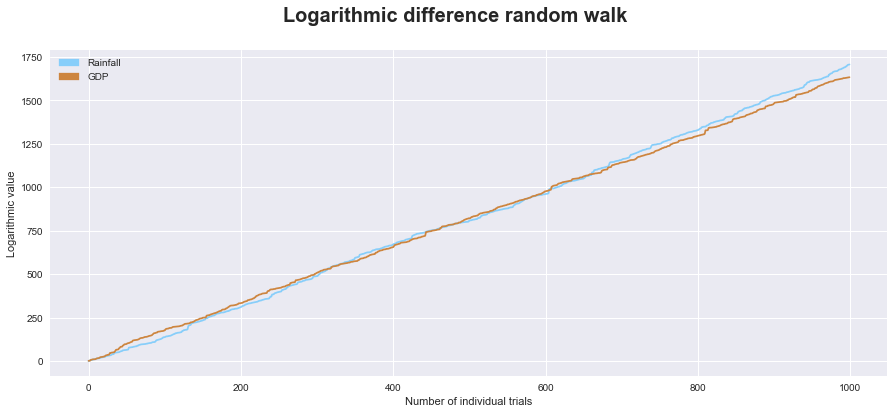

In [78]:
Sim3 = lognormal_gdp()
Sim3.lognormal_gdp_initiate()
Sim3.line_plot()

<function matplotlib.pyplot.show>

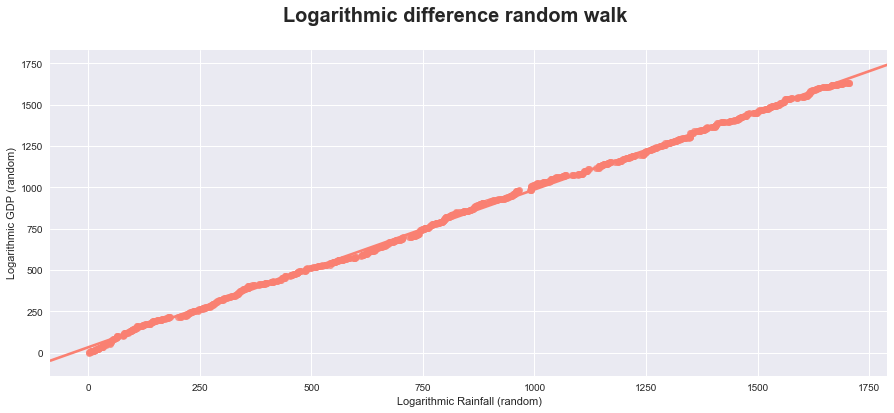

In [79]:
Sim3.scatter_plot()

In [80]:
Sim3.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         self.GDP_array   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.037e+06
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:35:22   Log-Likelihood:                -4095.5
No. Observations:                1000   AIC:                             8195.
Df Residuals:                     998   BIC:                             8205.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.1726      0.900     36.853      0.000      31.406      34.939
self.rainfall     0.9541      0.001   1018.381      0.000       0.952       0.956
==============================================================================
Omnibus:                       19.967   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.173
Skew:                           0.025   Prob(JB):                      0.00375
Kurtosis:                       2.485   Cond. No.                     1.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

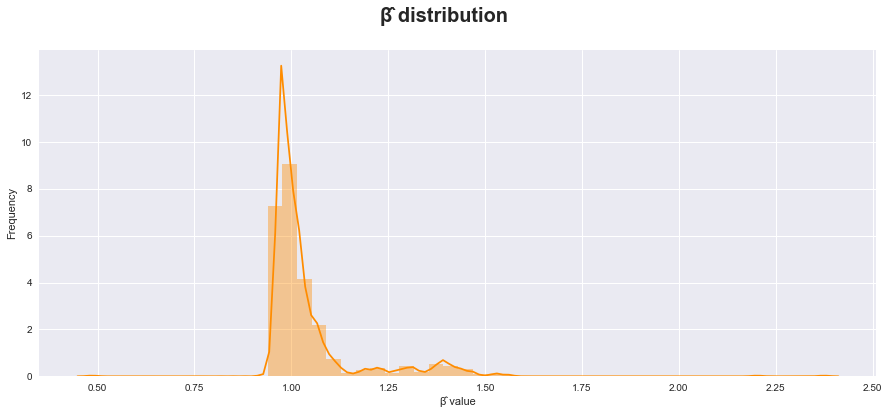

In [81]:
Sim3.ols()

<function matplotlib.pyplot.show>

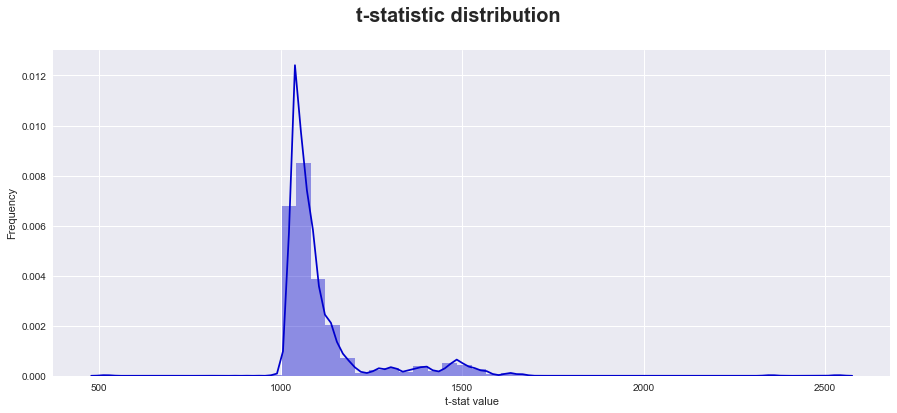

In [82]:
Sim3.t_stat()

In [83]:
Sim3.coint()

(0.8380172347720182,
 0.9922257016637901,
 0,
 999,
 {'1%': -3.4369127451400474,
  '10%': -2.568312754566378,
  '5%': -2.864437475834273},
 4766.876416558433)

In [84]:
class quarter_gamma:
    def __init__(self):
        pass
    
    def gamma_normal_initiate(self, sample = 1000):
        """
        Creates a gamma random variable for rainfall and a lognormal distribution of GDP,
        random walks are then generated based on randomly creates variables.
        sample = amount of trials to be carried out (default = 1000)
        """
        alpha = (qrain_mean/qrain_std)**2
        beta = (qrain_std**2) / qrain_mean
        self.n = sample
        
        self.q_rain = np.zeros(self.n)
        self.q_rain = np.random.gamma(alpha, beta, self.n)
        self.q_rain[0] = 0

        self.GDP = np.zeros(self.n)
        self.GDP = np.random.normal(GDP_mean, GDP_std, self.n)
        self.GDP[0] = 0

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.q_rain[t] = self.q_rain[t-1] + x[t]

        for t in range(self.n):
            self.GDP[t] = self.GDP[t-1] + y[t]
        return
    
    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walk (Gamma)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.q_rain, color = 'lightskyblue')
        plt.plot(self.GDP, color = 'peru')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='peru', label='GDP')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Sim gamma quarter\line.png')
        return plt.show()

    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Random walk simulation', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Gamma Rainfall (random)')
        ax.set_ylabel('Logarithmic GDP (random)')
        sct = sns.regplot(self.q_rain, self.GDP, color = 'salmon')
        #plt.savefig('Plots\Sim gamma quarter\scatter.png')
        return plt.show

    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        da = pd.DataFrame(self.q_rain, self.GDP)
        self.result = sm.ols(formula = 'self.GDP ~ self.q_rain', data = da).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.q_rain)*self.q_rain)**-1
        y_mtx = np.transpose(self.q_rain)*self.GDP
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Sim gamma quarter\ols.png')
        return plt.show()

    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Sim gamma quarter\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.GDP[t] + (self.betah[-1]*self.q_rain[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

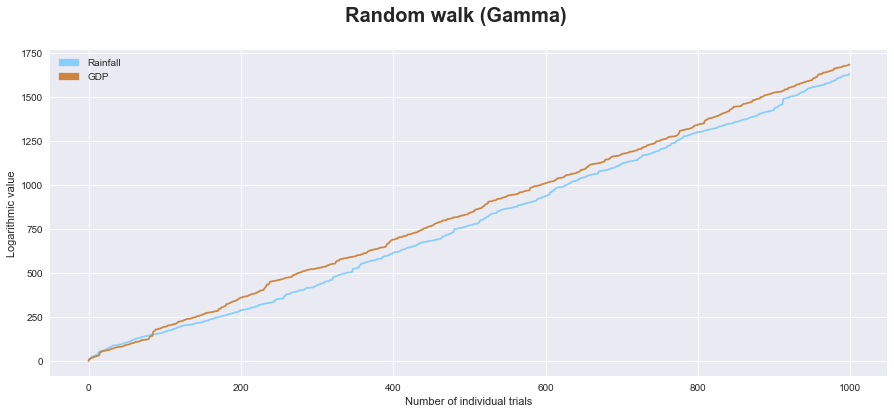

In [85]:
QG = quarter_gamma()
QG.gamma_normal_initiate()
QG.line_plot()

<function matplotlib.pyplot.show>

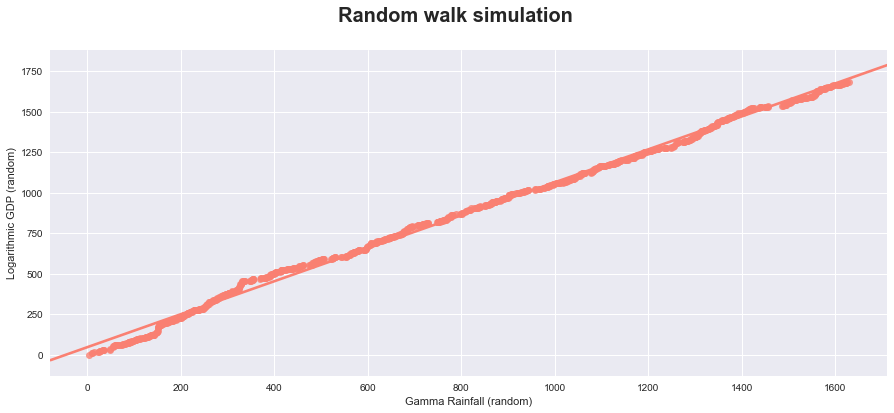

In [86]:
QG.scatter_plot()

In [87]:
QG.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               self.GDP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.896e+05
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:35:37   Log-Likelihood:                -4754.5
No. Observations:                1000   AIC:                             9513.
Df Residuals:                     998   BIC:                             9523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.3649      1.737     26.114      0.000      41.956      48.774
self.q_rain     1.0178      0.002    538.177      0.000       1.014       1.021
==============================================================================
Omnibus:                       13.497   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.770
Skew:                          -0.287   Prob(JB):                      0.00102
Kurtosis:                       3.027   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

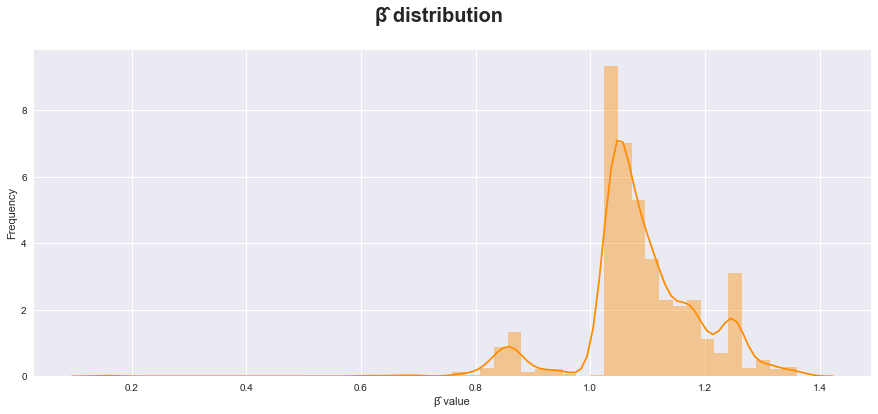

In [88]:
QG.ols()

<function matplotlib.pyplot.show>

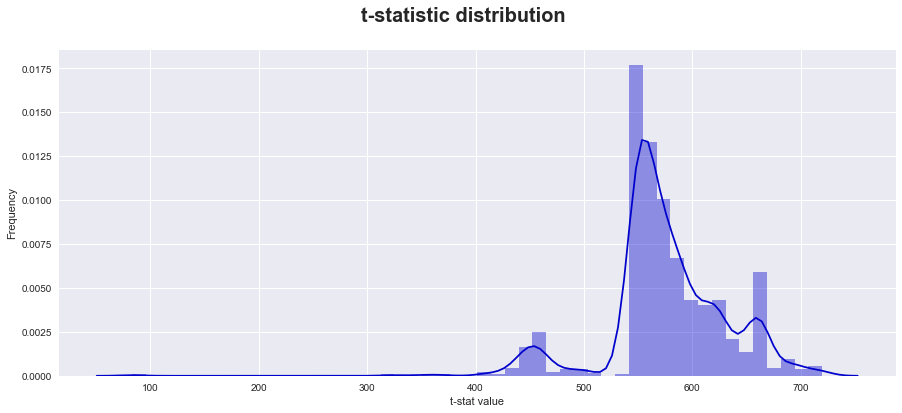

In [89]:
QG.t_stat()

In [90]:
QG.coint()

(1.0293292016471942,
 0.9945659657383777,
 1,
 998,
 {'1%': -3.4369193380671, '10%': -2.56831430323573, '5%': -2.864440383452517},
 4952.549949304587)

In [91]:
class quarter_gamma_trend:
    def __init__(self):
        pass
    
    def gamma_trend_initiate(self, sample = 1000, trend = 0.1):
        """
        Creates a gamma random variable for rainfall and a lognormal distribution of GDP,
        random walks are then generated based on randomly creates variables.
        sample = amount of trials to be carried out (default = 1000)
        trend = trend factor to add to each random walk (default is 0.1)
        """
        #Believe rainfall to have a rough gamma distribution, rather than normal
        #Can be seen through histograms plotted earlier, parameters for gamma then calculated
        alpha = (qrain_mean/qrain_std)**2
        beta = (qrain_std**2) / qrain_mean
        self.n = sample
        
        self.q_rain = np.zeros(self.n)
        self.q_rain = np.random.gamma(alpha, beta, self.n)
        self.q_rain[0] = 0

        self.GDP = np.zeros(self.n)
        self.GDP = np.random.normal(GDP_mean, GDP_std, self.n)
        self.GDP[0] = 0

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.q_rain[t] = trend + self.q_rain[t-1] + x[t]
            self.GDP[t] = trend + self.GDP[t-1] + y[t]
        return
    
    def line_plot(self):
        """
        Produces a line plot of both variables as a figure of time
        """
        fig = plt.figure()
        fig.suptitle('Random walk (w/ trend)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Number of individual trials')
        ax.set_ylabel('Logarithmic value')
        plt.plot(self.q_rain, color = 'lightskyblue')
        plt.plot(self.GDP, color = 'peru')
        red_patch = mpatches.Patch(color='lightskyblue', label='Rainfall')
        blue_patch = mpatches.Patch(color='peru', label='GDP')
        plt.legend(handles=[red_patch, blue_patch])
        #plt.savefig('Plots\Trend GDP\line.png')
        return plt.show()

    def scatter_plot(self):
        """
        Produces a scatter plot of variables against one another
        """
        fig = plt.figure()
        fig.suptitle('Random walk simulation (w/ trend)', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('Gamma Rainfall (random)')
        ax.set_ylabel('Logarithmic GDP (random)')
        sct = sns.regplot(self.q_rain, self.GDP, color = 'salmon')
        #plt.savefig('Plots\Trend GDP\scatter.png')
        return plt.show

    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        da = pd.DataFrame(self.q_rain, self.GDP)
        self.result = sm.ols(formula = 'self.GDP ~ self.q_rain', data = da).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.q_rain)*self.q_rain)**-1
        y_mtx = np.transpose(self.q_rain)*self.GDP
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\Trend GDP\ols.png')
        return plt.show()

    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\Trend GDP\dist.png')
        return plt.show
    
    def coint(self):
        u = np.zeros(self.n)
        for t in range(self.n):
            u[t] = self.GDP[t] + (self.betah[-1]*self.q_rain[t])
        u_diff = np.diff(u)
        u_array = np.array(u_diff)
        u_array = u_diff[~np.isnan(u_array)]
        x = adfuller(u)
        return x

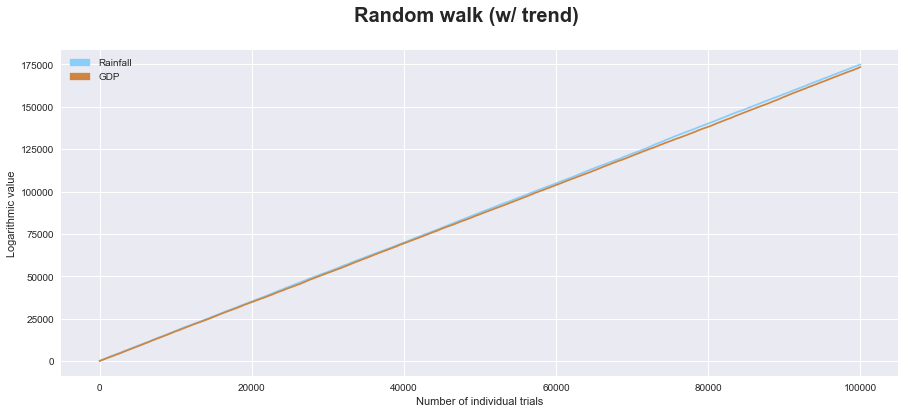

In [92]:
qgt = quarter_gamma_trend()
qgt.gamma_trend_initiate()
qgt.line_plot()

<function matplotlib.pyplot.show>

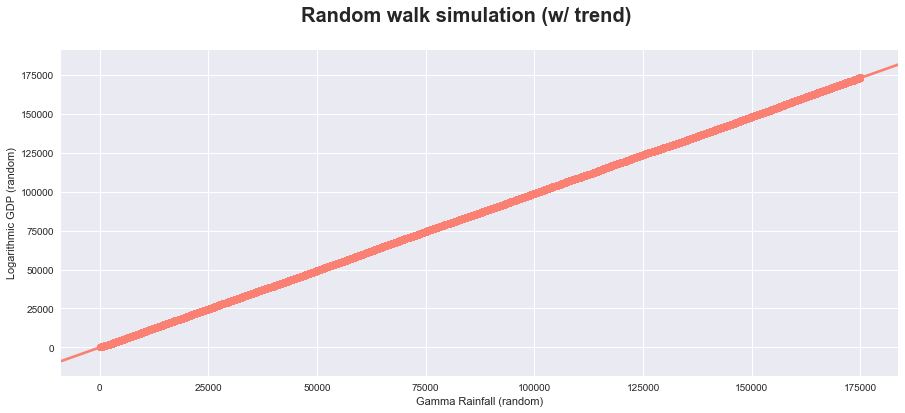

In [93]:
qgt.scatter_plot()

In [94]:
qgt.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               self.GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.084e+09
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:36:13   Log-Likelihood:            -6.6541e+05
No. Observations:              100000   AIC:                         1.331e+06
Df Residuals:                   99998   BIC:                         1.331e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -106.5794      1.189    -89.636      0.000    -108.910    -104.249
self.q_rain     0.9899   1.18e-05   8.42e+04      0.000       0.990       0.990
==============================================================================
Omnibus:                     2291.426   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2184.507
Skew:                          -0.324   Prob(JB):                         0.00
Kurtosis:                       2.677   Cond. No.                     2.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

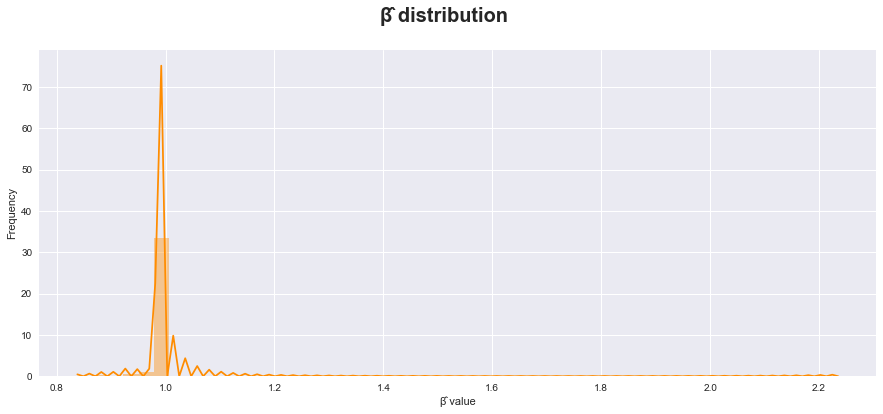

In [95]:
qgt.ols()

<function matplotlib.pyplot.show>

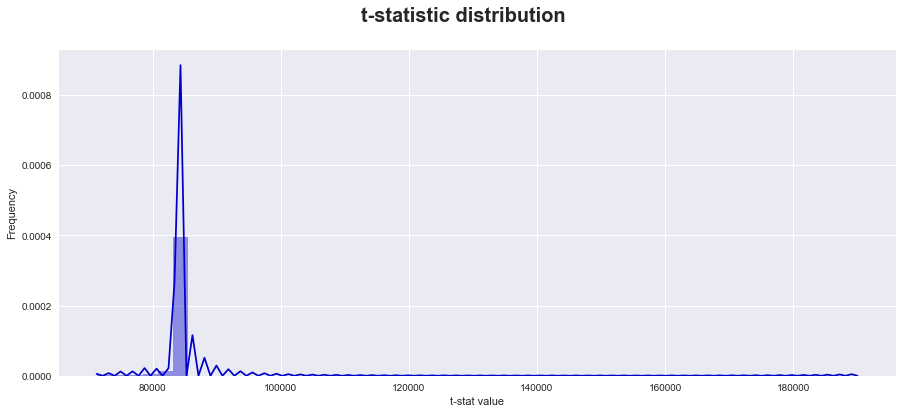

In [96]:
qgt.t_stat()

In [97]:
qgt.coint()

(0.19448478041408981,
 0.9719505600697984,
 0,
 99999,
 {'1%': -3.4304153953326493,
  '10%': -2.566785384434747,
  '5%': -2.8615689037124814},
 503721.449696688)

# Results for simple linear regression

From the results of every single simple linear regression simulation carried out it's possible to quickly see that the three deciding factors as to whether a regression is spurious are quite clear. In each simulation following the first one the values become more extreme showing more clear signs of a spurious regression.

Starting with simulations (2) , it's possible to see that simply simulating the value for rainfall, whilst keeping the original values of money demand and GDP, the intercept values becomes astronomically high in comparison to the coefficient for rain, as well as the t-statistic becoming much larger, in the range of 800-1500, for the intercept rather than the coefficient. The $R^{2}$ is also extremely high and the Durbin-Watson is quite low, typically about 0.05, indicating prolems already existing with the model. From simulation (1) it's clear to see that simply by simulating both variables as random walks, a more clear spurious trend starts to appear in the data, the $R^{2}$ starts increasing towards the value of 1, Durbin-Watson decreases towards a value of 0, and the t-statistic starts to diverge towards infinity. 

Simulation (3) is a bit more experimental in comparison to the rest. In this case we are taking the assumption that realistically rainfall can be distributed as a lognormal variable. The original data appeared to be quite skewed towards the beginning and we believed this was due to 2 reasons, firstly is that we are looking at the accumulated log rainfall rather than how much rainfall was measured in each month and secondly is the fact that when simply looking at just the log values, there appears to be a skewness in the data, therefore we assumed that a lognormal distribution could still suffice the distribution criteria. In this simulation we created lognormal distribution for each variable, then proceeded to take the differences between those randomly simulated values. This was done to see the impact that the error term played on the random walk variables, as the differences between the values would tend to be quite small. We can clearly see that the error term plays a big part in the correlation factor between variables and is one of the reasons that lead to this spurious results being present. Once again in this simulation the three characteristics of a spurious regression are quite clear, but the interesting thing is that the coefficient surpasses a value of 1, whereas in the other simulations they all appear to converge towards a value of 1.

Simulations (4) and (5) are similar with the exception of equation (5) adding a constant trending term to the random walks. These simulations are what we believe to be the most 'optimal' at proving the point of a spurious regression being present, but also the most accurate in being able to recreate the variables. In simulation (4), the $R^{2}$ appears to range from 0.995 upwards to a value of 1, essentially stating that the model can explain 100% of the variability in the data, which realistically, Perth rainfall should not be able to do for either UK money demand or US GDP. The t-statistic also starts diverging towards infinity and Durbin Watson indicates extreme autocorrelation between the variables, essentially everything that appeared in equation (1) becomes more apparent. When adding the trending term of value 0.1 in simulation (5), the $R^{2}$ value appears to be 0.999 or 1 in every simulation with 1000 samples, the t-statistic skyrockets to value of 5000+ and the Durbin Watson value becomes essentially non-existent, which are all good signs that we would be expecting from a spurious regression.

Interestingly from distributions of the $\hat{β}$ estimator and the distribution of the t-statistic, we can see what appears to be a gamma distribution, with t-statistic extreme values occuring more frequently as our sample size increases but our $\hat{β}
$ estimator appears to converge towards 1 as the sample size increases. From the cointegration tests carried out using the Dickey Fuller test, we only looked at the second value being produced, the p-value. In every case, even with the original data the p-value is significantly higher than 0.05 which we are using as our significance level, meaning a unit root process is clearly a good method.

Overall the results clearly indicate the presence of a Spurious regression being available within our data, serial correlation being present and realistically creating nonsensical results. As discussed by Phillips (1986) and Engle and Granger (1987), the t-statistic value is not an accurate measurement or a good indication for the sampling of a such a distribution and in the paper other methods are discussed, however they are not mentioned or looked at in this paper. The results presented here are only looking at a single variable being able to estimate another however the results appear to change as more variables are added.

# Multiple linear regression

In [99]:
class multiple_linear:
    def __init__(self):
        pass
    
    def gamma_normal_initiate(self, sample = 1000):
        """
        Creates 6 random variables with lognormal distributions and rainfall as a gamma distribution,
        generates random walks for each one.
        sample = amount of trials to be carried out (default = 1000)
        """
        #Believe rainfall to have a rough gamma distribution, rather than normal
        #Can be seen through histograms plotted earlier, parameters for gamma then calculated
        alpha = (qrain_mean/qrain_std)**2
        beta = (qrain_std**2) / qrain_mean
        self.n = sample
        
        self.q_rain = np.zeros(self.n)
        self.q_rain = np.random.gamma(alpha, beta, self.n)
        self.q_rain[0] = 0

        self.GDP = np.zeros(self.n)
        self.GDP = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.GDP[0] = 0
        
        self.q = np.zeros(self.n)
        self.q = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.q[0] = 0
        
        self.qi = np.zeros(self.n)
        self.qi = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qi[0] = 0
        
        self.qb = np.zeros(self.n)
        self.qb = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qb[0] = 0
        
        self.qc = np.zeros(self.n)
        self.qc = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qc[0] = 0
        
        self.qm = np.zeros(self.n)
        self.qm = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qm[0] = 0

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)
        z = np.random.lognormal(size=self.n)
        a = np.random.lognormal(size=self.n)
        b = np.random.lognormal(size=self.n)
        c = np.random.lognormal(size=self.n)
        d = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.q_rain[t] = self.q_rain[t-1] + x[t]
            self.GDP[t] = self.GDP[t-1] + y[t]
            self.q[t] = self.q[t-1] + z[t]
            self.qi[t] = self.qi[t-1] + a[t]
            self.qb[t] = self.qb[t-1] + b[t]
            self.qc[t] = self.qc[t-1] + c[t]
            self.qm[t] = self.qm[t-1] + d[t]
        return
    
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        du = pd.DataFrame(data = {'1': self.q_rain,'2': self.GDP,'3': self.q, '4': self.qi, '5': self.qb,
                                  '6': self.qc, '7': self.qm})
        self.result = sm.ols(formula = 'self.GDP ~ self.q_rain+self.q+self.qi+self.qb+self.qc+self.qm', data = du).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        
        X_mtx = (np.transpose(self.q_rain)*self.q_rain)**-1
        y_mtx = np.transpose(self.q_rain)*self.GDP
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\MLR\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\MLR\dist.png')
        return plt.show

In [100]:
MLR = multiple_linear()
MLR.gamma_normal_initiate()
MLR.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               self.GDP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.820e+05
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:37:15   Log-Likelihood:                -4059.1
No. Observations:                1000   AIC:                             8132.
Df Residuals:                     993   BIC:                             8167.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -19.0399      1.961     -9.710      0.000     -22.888     -15.192
self.q_rain    -0.1142      0.041     -2.754      0.006      -0.196      -0.033
self.q         -0.1255      0.048     -2.612      0.009      -0.220      -0.031
self.qi         0.1261      0.035      3.573      0.000       0.057       0.195
self.qb         0.0409      0.056      0.725      0.468      -0.070       0.151
self.qc         0.3612      0.036      9.995      0.000       0.290       0.432
self.qm         0.6761      0.055     12.295      0.000       0.568       0.784
==============================================================================
Omnibus:                       21.608   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.493
Skew:                           0.365   Prob(JB):                     1.31e-05
Kurtosis:                       3.086   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

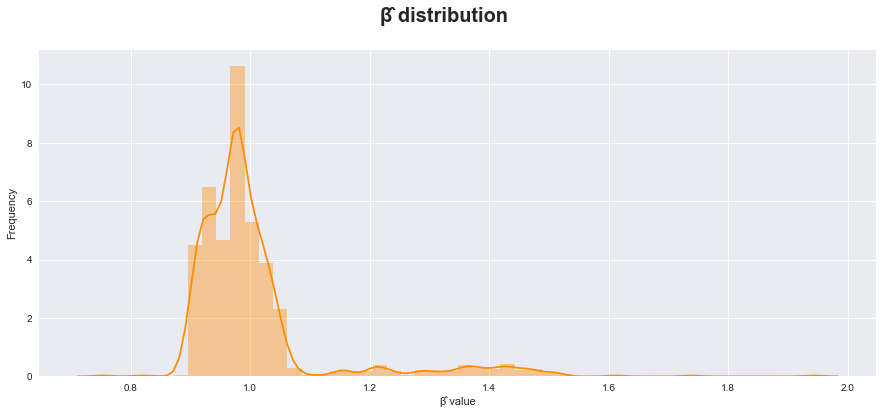

In [101]:
MLR.ols()

<function matplotlib.pyplot.show>

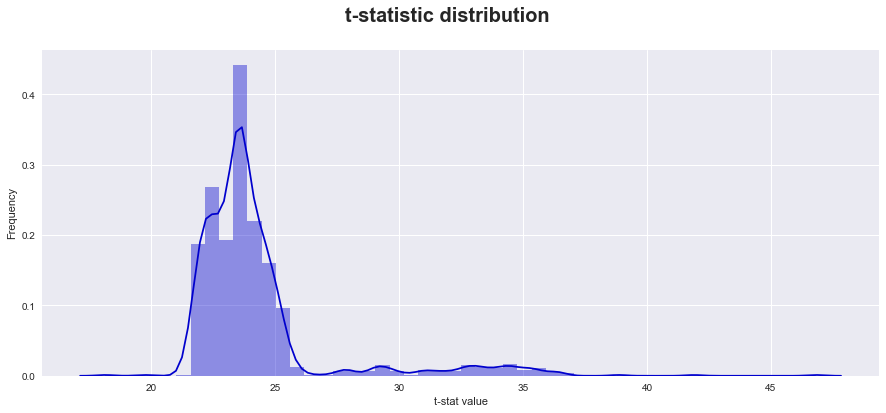

In [102]:
MLR.t_stat()

In [104]:
class multiple_linear_16:
    def __init__(self):
        pass
    
    def gamma_normal_initiate(self, sample = 1000):
        """
        Creates 15 random variables with lognormal distributions and rainfall as a gamma distribution,
        generates random walks for each one.
        sample = amount of trials to be carried out (default = 1000)
        """
        #Believe rainfall to have a rough gamma distribution, rather than normal
        #Can be seen through histograms plotted earlier, parameters for gamma then calculated
        alpha = (qrain_mean/qrain_std)**2
        beta = (qrain_std**2) / qrain_mean
        self.n = sample
        
        self.q_rain = np.zeros(self.n)
        self.q_rain = np.random.gamma(alpha, beta, self.n)
        self.q_rain[0] = 0

        self.GDP = np.zeros(self.n)
        self.GDP = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.GDP[0] = 0
        
        self.q = np.zeros(self.n)
        self.q = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.q[0] = 0
        
        self.qi = np.zeros(self.n)
        self.qi = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qi[0] = 0
        
        self.qb = np.zeros(self.n)
        self.qb = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qb[0] = 0
        
        self.qc = np.zeros(self.n)
        self.qc = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qc[0] = 0
        
        self.qm = np.zeros(self.n)
        self.qm = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qm[0] = 0
        #
        self.qo = np.zeros(self.n)
        self.qo = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qo[0] = 0
        
        self.qp = np.zeros(self.n)
        self.qp = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qp[0] = 0
        
        self.qv = np.zeros(self.n)
        self.qv = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qv[0] = 0
        
        self.qr = np.zeros(self.n)
        self.qr = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qr[0] = 0
        
        self.ql = np.zeros(self.n)
        self.ql = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.ql[0] = 0
        
        self.qu = np.zeros(self.n)
        self.qu = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qu[0] = 0
        
        self.qz = np.zeros(self.n)
        self.qz = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qz[0] = 0
        
        self.qk = np.zeros(self.n)
        self.qk = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qk[0] = 0
        
        self.qq = np.zeros(self.n)
        self.qq = np.random.lognormal(GDP_mean, GDP_std, self.n)
        self.qq[0] = 0

        x = np.random.lognormal(size=self.n)
        y = np.random.lognormal(size=self.n)
        z = np.random.lognormal(size=self.n)
        a = np.random.lognormal(size=self.n)
        b = np.random.lognormal(size=self.n)
        c = np.random.lognormal(size=self.n)
        d = np.random.lognormal(size=self.n)
        e = np.random.lognormal(size=self.n)
        f = np.random.lognormal(size=self.n)
        g = np.random.lognormal(size=self.n)
        h = np.random.lognormal(size=self.n)
        i = np.random.lognormal(size=self.n)
        j = np.random.lognormal(size=self.n)
        k = np.random.lognormal(size=self.n)
        l = np.random.lognormal(size=self.n)
        m = np.random.lognormal(size=self.n)

        for t in range(self.n):
            self.q_rain[t] = self.q_rain[t-1] + x[t]
            self.GDP[t] = self.GDP[t-1] + y[t]
            self.q[t] = self.q[t-1] + z[t]
            self.qi[t] = self.qi[t-1] + a[t]
            self.qb[t] = self.qb[t-1] + b[t]
            self.qc[t] = self.qc[t-1] + c[t]
            self.qm[t] = self.qm[t-1] + d[t]
            self.qo[t] = self.qo[t-1] + e[t]
            self.qp[t] = self.qp[t-1] + f[t]
            self.qv[t] = self.qv[t-1] + g[t]
            self.qr[t] = self.qr[t-1] + h[t]
            self.ql[t] = self.ql[t-1] + i[t]
            self.qu[t] = self.qu[t-1] + j[t]
            self.qz[t] = self.qz[t-1] + k[t]
            self.qk[t] = self.qk[t-1] + l[t]
            self.qq[t] = self.qq[t-1] + m[t]
        return
    
    def line_plot(self):
        plt.plot
    
    def result(self):
        """
        Produces an OLS Regression Result summary
        """
        du = pd.DataFrame(data = {'1': self.q_rain,'2': self.GDP,'3': self.q, '4': self.qi, '5': self.qb, 
                                  '6': self.qc, '7': self.qm, '8': self.qo, '9': self.qp, '10': self.qv, 
                                  '11': self.qr, '12': self.ql, '13': self.qu, '14': self.qz, '15': self.qk, '16': self.qq})
        self.result = sm.ols(formula = 'self.GDP ~ self.q_rain+self.q+self.qi+self.qb+self.qc+self.qm+self.qo+self.qp+self.qv+self.qr+self.ql+self.qu+self.qz+self.qk+self.qq', data = du).fit()
        result_2 = self.result.summary()
        return result_2
    
    def ols(self):
        """
        Calculates the value of beta^ and plots a histogram for ditribution of beta^
        """
        X_mtx = (np.transpose(self.q_rain)*self.q_rain)**-1
        y_mtx = np.transpose(self.q_rain)*self.GDP
        self.betah = X_mtx*y_mtx
        fig = plt.figure()
        fig.suptitle('β̂ distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('β̂ value')
        ax.set_ylabel('Frequency')
        sns.distplot(self.betah, color = 'darkorange')
        #plt.savefig('Plots\MLR16\ols.png')
        return plt.show()
    
    def t_stat(self):
        """
        Calculates the value of the t-statistic for each beta^ and produces a histogram for the t-distribution
        """
        t_stat = self.betah / self.result.bse[1] 
        fig = plt.figure()
        fig.suptitle('t-statistic distribution', fontsize=20, fontweight='bold')
        ax = fig.add_subplot(111)
        ax.set_xlabel('t-stat value')
        ax.set_ylabel('Frequency')
        sns.distplot(t_stat, color = 'mediumblue')
        #plt.savefig('Plots\MLR16\dist.png')
        return plt.show

In [105]:
MLR16 = multiple_linear_16()
MLR16.gamma_normal_initiate()
MLR16.result()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               self.GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.574e+05
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:37:26   Log-Likelihood:                -3394.2
No. Observations:                1000   AIC:                             6820.
Df Residuals:                     984   BIC:                             6899.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.9965      1.532      6.524      0.000       6.990      13.003
self.q_rain    -0.0537      0.028     -1.888      0.059      -0.109       0.002
self.q          0.2912      0.021     14.032      0.000       0.251       0.332
self.qi        -0.0852      0.030     -2.852      0.004      -0.144      -0.027
self.qb         0.1511      0.026      5.856      0.000       0.100       0.202
self.qc         0.5349      0.029     18.338      0.000       0.478       0.592
self.qm        -0.1348      0.026     -5.241      0.000      -0.185      -0.084
self.qo        -0.3739      0.046     -8.212      0.000      -0.463      -0.285
self.qp         0.1236      0.031      4.047      0.000       0.064       0.184
self.qv         0.1049      0.025      4.262      0.000       0.057       0.153
self.qr        -0.4643      0.027    -17.174      0.000      -0.517      -0.411
self.ql         0.2261      0.023      9.722      0.000       0.180       0.272
self.qu         0.4676      0.024     19.531      0.000       0.421       0.515
self.qz        -0.0441      0.022     -1.969      0.049      -0.088      -0.000
self.qk        -0.0888      0.019     -4.632      0.000      -0.126      -0.051
self.qq         0.2437      0.024     10.135      0.000       0.197       0.291
==============================================================================
Omnibus:                       27.795   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.385
Skew:                          -0.358   Prob(JB):                     1.53e-07
Kurtosis:                       3.490   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

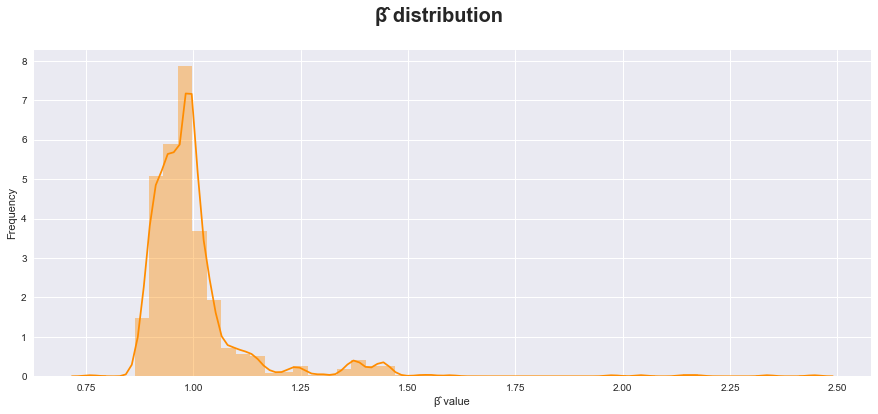

In [106]:
MLR16.ols()

<function matplotlib.pyplot.show>

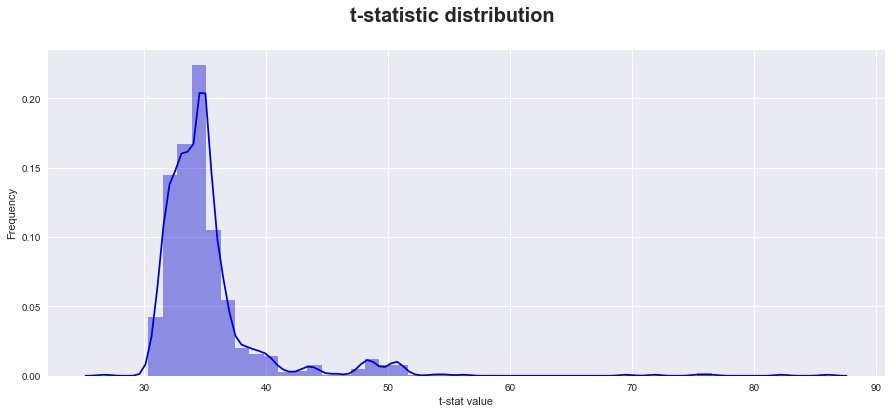

In [107]:
MLR16.t_stat()

# Results for Multiple Linear Regression

From multiple linear regression it's plausible to deduce that multiple variables create a more 'stable' or realistic looking model. There were limitations with creating these models however. The first being that from the original three variables given to us, we were forced to create arbitrary variables thereafter. The parameters for all the arbitrary variables as well as the distributions are the same, possesing a lognormal distribution following a $μ =$ GDP_mean and a $σ = $ GDP_std. The simulations were only carried out for GDP as there was also the assumption that if it works for one of the variables, it would work for the other (Money Demand)

From this, two simulations were carried out, the first being with 7 variables, and the second with 16. From the first simulation, the impact of adding extra variables is not necessarily clear from the $R^{2}$ values and the Durbin-Watson statistic is still farily close to 0, the interesting realization is that the t-statistic becomes appears to start to converge rather than diverge. From the second simulation carried out using 16 variables, the $R^{2}$ is still extremely high but at the same time the assumption can be made that adding more variables is able to better explain the data. The Durbin-Watson value starts to increase and although still quite extreme it starts to better account for the autocorrelation in the data. The t-statistic and $\hat{β}$ estimator start to approach a more normal distribution, or a t-distribution, this is an indication that a t-statistic can be used as a good estimator in the case of a multiple linear regression whereas in a simple linear regression, the t-statistic was essentially a negligible value.

These simulations showcased that spurious regressions appear to be much more commonly observed when carrying out simple linear regression but the fake relationship starts to dwindle or disappear as more variables are added. This helps to explain that aspects such as GDP and money demand are much more complex economical indicators and that multiple variables are required in order to explain or account for them.

# Conclusion 

The final conclusion that can be made is that the relationship between Perth Rainfall and UK money demand/US GDP is nonsensical and can be said to be spurious. The three key criterion being $R^{2}$, t-statistic and Durbin-Watson statistic (Granger & Newbold, 1974) were all proven to essentially show a fake relationship between the data. The autocorrelation between the variables was simply too high for it to be believed to be related, the t-statistic values were essentially negligible due to their divergence into infinity as the sameple size increase and saying that nearly all of the variability in the data at any point in time can be accounted for, simply through rainfall is also a nonsensical claim in itself. Therefore a decision that a simple linear regression model, using an OLS estimator is simply not suitable for this type of data (or at least in creating a real relationship).

Multiple linear regression appeared to fare much better as a model. The $R^{2}$ values are still too high, as in a realistic world no economist should be able to account for 100% of the variability in the GDP or Money Demand of any economy. the t-statistic and $\hat{β}$ estimator appeared much better, taking on a more 'natural' shape. The Durbin-Watson statistic also showed signs that it was increasing, hence stating there was less autocorrelation between the model and a more realistic model was starting to take shape. The difference in the three criterion, between 7 variables and 16 variables was also quite high, with the latter showing better signs of a realistic relationship being present. Two things that can be stated from our multiple linear regression is that the models using the same parameters for each variable is not essential in any way and in a realistic setting it would be expected that every variable would take on different distributions with differing parameters however it can also be said that GDP and money demand are two variables that are much more complex in nature and a single variable should not be able to account for everything that happens to those two.

For future problems such as this a couple of things would be beneficial. Firstly have a dataset that contains all the variables in it rather than having two seperate files containing different variables, this would help to create parameters that are more stable, rather than creating them based on differently sized data. Secondly would be to find a better estimator rather than OLS to create more sense of the data, in the case of this paper the t-statistic essentially became a negligible value. Thirdly would be having more data present, although an obvious one, the more time data present to us the better the assumptions, better estimators and better distributions can be created from it. Lastly and most importantly would be having more variables, in this case it would be beneficial to have more economic variables present, variables such as Price Index, inflation, unemployment rate, interest rates, exchange rates, etc. All these economical variables would serve as better variables, estimators and indicators in creating a more efficient model to better explain GDP and money demand. 

Although there were flaws with the processes and data, a spurious regression can still be seen quite clearly. For the sake of the argument however let's assume that the person reading this does not understand any of the analysis, any of the generating processes used or anything in relation to statistics or any economical terms, the simplest explanation to them can come from five words and a somewhat famous quote. Correlation does not equal causation.

## References

Frisch, Ragnar. 1933. "Editor's Note". _Econometrica_ 1(1): 1-4. http://www.jstor.org/stable/1912224

Granger, Clive W. J., and Paul Newbold. 1974. "Spurious Regression in Econometrics." _Journal of Econometrics_ 2(2): 111-120. https://doi.org/10.1016/0304-4076(74)90034-7

Peter C. B. Philips. 1986. "Understanding Spurious Regressions in Econometrics." _Journal of Econometrics_ 33(3): 311-340. https://doi.org/10.1016/0304-4076(86)90001-1

Chan, N. H. and C. Z. Wei. 1987. "Asymptotic Inference for Nearly Nonstationary AR(1) Processes." _The Annals of Statistics_ 15(3): 1050-1063. https://www.jstor.org/stable/pdf/2241815.pdf?refreqid=excelsior%3Ace706c358470fb955648241fb48dba90

Engle, Robert F., Clive W. J. Granger. 1987. "Co-Integration and Error Correction Representation, Estimation, and Testing." _Econometrica_ 55(2): 251-276. http://dx.doi.org/10.2307/1913236

Dickey, David A., and Wayne A. Fuller. 1979. "Distribution of the Estimators for Autoregressive Time Series With a Unit Root." _Journal of the American Statistical Association_ 74(366): 427-431. https://doi.org/10.1080/01621459.1979.10482531